In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date
from datetime import timedelta

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
import xgboost as xgb
import os

from sklearn.linear_model import Lasso, LassoCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer

pd.options.display.max_columns = None

import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [4]:
#This dataset was preprocessed and merged from a previous notebook
df = pd.read_csv('/users/tedwen/VCHAMPS/TeamBCEagles/TeamBCEagles_Cardio_Mortality/TeamBCEagles_Cardio_Mortality_Train.csv')
df['heart_mortality'] = df['heart_mortality'].astype(int)
df['heart_related'] = df['heart_related'].astype(int)
df['ruca_order'] = [int(value) for value in df['ruca_order']]
df.drop(columns=['num_medication'], inplace=True)
df

,internalpatientid,sum_abn_dia,sum_abn_sys,Abnormal weight loss,Alcohol Relevnant,Anemia Relevant,Cardiac Related,Cocaine dependence,Depression,"Diabetes, all type",Dyspnea,Heart transplant,"Hypertension, all type","Hypothyroidism, all causes",Kidney,Liver,Major depressive disorder,Malignant neoplasm,Opioid,PTSD,"Pain, all types","Pneumonia, all type",Renal relevant,"Respiratory, all types","Schizophrenia, all types",Sleep apnea,Tobacco Relevant,Vascular Related,atrial relevant,heart block,heart disease,heart failure,heart related,heart valve,heart valve related,hypercholesterolemia,hyperlipidemia,pulmonary,ruca_order,Male,Divorced,Married,Never married,Separated,Single,Widowed,Asian,Black or African American,White,Multiracial,num_in_visit,inpatient_first_hash1,inpatient_first_hash2,inpatient_first_hash3,inpatient_first_hash4,inpatient_first_hash5,inpatient_first_hash6,inpatient_first_hash7,inpatient_first_hash8,inpatient_first_hash9,inpatient_first_hash10,inpatient_first_hash11,inpatient_first_hash12,inpatient_first_hash13,inpatient_first_hash14,inpatient_first_hash15,inpatient_first_hash16,inpatient_first_hash17,inpatient_first_hash18,inpatient_first_hash19,inpatient_first_hash20,inpatient_second_hash1,inpatient_second_hash2,inpatient_second_hash3,inpatient_second_hash4,inpatient_second_hash5,inpatient_second_hash6,inpatient_second_hash7,inpatient_second_hash8,inpatient_second_hash9,inpatient_second_hash10,inpatient_second_hash11,inpatient_second_hash12,inpatient_second_hash13,inpatient_second_hash14,inpatient_second_hash15,inpatient_second_hash16,inpatient_second_hash17,inpatient_second_hash18,inpatient_second_hash19,inpatient_second_hash20,inpatient_discharge__Dummy_BLIND REHAB,inpatient_discharge__Dummy_DOMICILIARY,inpatient_discharge__Dummy_INTERMEDIATE MED,inpatient_discharge__Dummy_MEDICINE,inpatient_discharge__Dummy_NEUROLOGY,inpatient_discharge__Dummy_NHCU,inpatient_discharge__Dummy_PSYCHIATRY,inpatient_discharge__Dummy_REHAB MEDICINE,inpatient_discharge__Dummy_SPINAL CORD INJURY,inpatient_discharge__Dummy_SURGERY,height,pain,pulse,pulse_oximetry,respiratory_rate,temperature,weight,num_ed_visit,ed_first_hash1,ed_first_hash2,ed_first_hash3,ed_first_hash4,ed_first_hash5,ed_first_hash6,ed_first_hash7,ed_first_hash8,ed_first_hash9,ed_first_hash10,ed_first_hash11,ed_first_hash12,ed_first_hash13,ed_first_hash14,ed_first_hash15,ed_first_hash16,ed_first_hash17,ed_first_hash18,ed_first_hash19,ed_first_hash20,ed_second_hash1,ed_second_hash2,ed_second_hash3,ed_second_hash4,ed_second_hash5,ed_second_hash6,ed_second_hash7,ed_second_hash8,ed_second_hash9,ed_second_hash10,ed_second_hash11,ed_second_hash12,ed_second_hash13,ed_second_hash14,ed_second_hash15,ed_second_hash16,ed_second_hash17,ed_second_hash18,ed_second_hash19,ed_second_hash20,acetylsalicylic acid,docusate,furosemide,metoprolol,salbutamol,num_outpatients_visits,heart_related,heart_mortality,age_ordinal
0,2,57,229,0.0,0.0,22.0,9.0,0.0,1.0,95.0,4.0,0.0,29.0,0.0,6.0,0.0,0.0,84.0,0.0,0.0,65.0,10.0,0.0,30.0,89.0,4.0,15.0,1.0,0.0,0.0,19.0,106.0,0.0,0.0,0.0,0.0,25.0,153.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.590044,2.156863,79.884191,97.483444,18.279383,97.741682,182.128067,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1476.0,1,0,7
1,2,57,229,0.0,0.0,22.0,9.0,0.0,1.0,95.0,4.0,0.0,29.0,0.0,6.0,0.0,0.0,84.0,0.0,0.0,65.0,10.0,0.0,30.0,89.0,4.0,15.0,1.0,0.0,0.0,19.0,106.0,0.0,0.0,0.0,0.0,25.0,153.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [5]:
one_hot_encoded = pd.get_dummies(df['age_ordinal'], prefix='dummy')

# Add a word in front of the dummy variable columns
prefix_word = 'age'
prefixed_encoded = one_hot_encoded.add_prefix(prefix_word + '_')


# Concatenate the encoded DataFrame with the original DataFrame
df = pd.concat([df, prefixed_encoded], axis=1)

In [6]:
one_hot_encoded = pd.get_dummies(df['ruca_order'], prefix='dummy')

# Add a word in front of the dummy variable columns
prefix_word = 'ruca'
prefixed_encoded = one_hot_encoded.add_prefix(prefix_word + '_')


# Concatenate the encoded DataFrame with the original DataFrame
df = pd.concat([df, prefixed_encoded], axis=1)

In [7]:
df.drop(columns=['age_ordinal'], inplace=True)
df.drop(columns=['ruca_order'], inplace=True)
df

,internalpatientid,sum_abn_dia,sum_abn_sys,Abnormal weight loss,Alcohol Relevnant,Anemia Relevant,Cardiac Related,Cocaine dependence,Depression,"Diabetes, all type",Dyspnea,Heart transplant,"Hypertension, all type","Hypothyroidism, all causes",Kidney,Liver,Major depressive disorder,Malignant neoplasm,Opioid,PTSD,"Pain, all types","Pneumonia, all type",Renal relevant,"Respiratory, all types","Schizophrenia, all types",Sleep apnea,Tobacco Relevant,Vascular Related,atrial relevant,heart block,heart disease,heart failure,heart related,heart valve,heart valve related,hypercholesterolemia,hyperlipidemia,pulmonary,Male,Divorced,Married,Never married,Separated,Single,Widowed,Asian,Black or African American,White,Multiracial,num_in_visit,inpatient_first_hash1,inpatient_first_hash2,inpatient_first_hash3,inpatient_first_hash4,inpatient_first_hash5,inpatient_first_hash6,inpatient_first_hash7,inpatient_first_hash8,inpatient_first_hash9,inpatient_first_hash10,inpatient_first_hash11,inpatient_first_hash12,inpatient_first_hash13,inpatient_first_hash14,inpatient_first_hash15,inpatient_first_hash16,inpatient_first_hash17,inpatient_first_hash18,inpatient_first_hash19,inpatient_first_hash20,inpatient_second_hash1,inpatient_second_hash2,inpatient_second_hash3,inpatient_second_hash4,inpatient_second_hash5,inpatient_second_hash6,inpatient_second_hash7,inpatient_second_hash8,inpatient_second_hash9,inpatient_second_hash10,inpatient_second_hash11,inpatient_second_hash12,inpatient_second_hash13,inpatient_second_hash14,inpatient_second_hash15,inpatient_second_hash16,inpatient_second_hash17,inpatient_second_hash18,inpatient_second_hash19,inpatient_second_hash20,inpatient_discharge__Dummy_BLIND REHAB,inpatient_discharge__Dummy_DOMICILIARY,inpatient_discharge__Dummy_INTERMEDIATE MED,inpatient_discharge__Dummy_MEDICINE,inpatient_discharge__Dummy_NEUROLOGY,inpatient_discharge__Dummy_NHCU,inpatient_discharge__Dummy_PSYCHIATRY,inpatient_discharge__Dummy_REHAB MEDICINE,inpatient_discharge__Dummy_SPINAL CORD INJURY,inpatient_discharge__Dummy_SURGERY,height,pain,pulse,pulse_oximetry,respiratory_rate,temperature,weight,num_ed_visit,ed_first_hash1,ed_first_hash2,ed_first_hash3,ed_first_hash4,ed_first_hash5,ed_first_hash6,ed_first_hash7,ed_first_hash8,ed_first_hash9,ed_first_hash10,ed_first_hash11,ed_first_hash12,ed_first_hash13,ed_first_hash14,ed_first_hash15,ed_first_hash16,ed_first_hash17,ed_first_hash18,ed_first_hash19,ed_first_hash20,ed_second_hash1,ed_second_hash2,ed_second_hash3,ed_second_hash4,ed_second_hash5,ed_second_hash6,ed_second_hash7,ed_second_hash8,ed_second_hash9,ed_second_hash10,ed_second_hash11,ed_second_hash12,ed_second_hash13,ed_second_hash14,ed_second_hash15,ed_second_hash16,ed_second_hash17,ed_second_hash18,ed_second_hash19,ed_second_hash20,acetylsalicylic acid,docusate,furosemide,metoprolol,salbutamol,num_outpatients_visits,heart_related,heart_mortality,age_dummy_1,age_dummy_2,age_dummy_3,age_dummy_4,age_dummy_5,age_dummy_6,age_dummy_7,age_dummy_8,age_dummy_9,age_dummy_10,age_dummy_11,age_dummy_12,ruca_dummy_0,ruca_dummy_1,ruca_dummy_2
0,2,57,229,0.0,0.0,22.0,9.0,0.0,1.0,95.0,4.0,0.0,29.0,0.0,6.0,0.0,0.0,84.0,0.0,0.0,65.0,10.0,0.0,30.0,89.0,4.0,15.0,1.0,0.0,0.0,19.0,106.0,0.0,0.0,0.0,0.0,25.0,153.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.590044,2.156863,79.884191,97.483444,18.279383,97.741682,182.128067,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1476.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,2,57,229,0.0,0.0,22.0,9.0,0.0,1.0,95.0,4.0,0.0,29.0,0.0,6.0,0.0,0.0,84.0,0.0,0.0,65.0,10.0,0.0,30.0,89.0,4.0,15.0,1.0,0.0,0.0,19.0,106.0,0.0,0.0,0.0,0.0,25.0,153.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,

In [8]:
# Rescale the continuous variables to 0-1 scale to be consistent

In [9]:
columns_to_scale = ['num_ed_visit','num_in_visit','num_outpatients_visits','pain','pulse','pulse_oximetry','respiratory_rate','temperature','weight','height','sum_abn_dia','sum_abn_sys']

In [10]:
def min_max_scale_columns(df, columns_to_scale):
    for col in columns_to_scale:
        min_value = df[col].min()
        max_value = df[col].max()
        df[col] = (df[col] - min_value) / (max_value - min_value)

    return df

In [11]:
df = min_max_scale_columns(df, columns_to_scale)
df

,internalpatientid,sum_abn_dia,sum_abn_sys,Abnormal weight loss,Alcohol Relevnant,Anemia Relevant,Cardiac Related,Cocaine dependence,Depression,"Diabetes, all type",Dyspnea,Heart transplant,"Hypertension, all type","Hypothyroidism, all causes",Kidney,Liver,Major depressive disorder,Malignant neoplasm,Opioid,PTSD,"Pain, all types","Pneumonia, all type",Renal relevant,"Respiratory, all types","Schizophrenia, all types",Sleep apnea,Tobacco Relevant,Vascular Related,atrial relevant,heart block,heart disease,heart failure,heart related,heart valve,heart valve related,hypercholesterolemia,hyperlipidemia,pulmonary,Male,Divorced,Married,Never married,Separated,Single,Widowed,Asian,Black or African American,White,Multiracial,num_in_visit,inpatient_first_hash1,inpatient_first_hash2,inpatient_first_hash3,inpatient_first_hash4,inpatient_first_hash5,inpatient_first_hash6,inpatient_first_hash7,inpatient_first_hash8,inpatient_first_hash9,inpatient_first_hash10,inpatient_first_hash11,inpatient_first_hash12,inpatient_first_hash13,inpatient_first_hash14,inpatient_first_hash15,inpatient_first_hash16,inpatient_first_hash17,inpatient_first_hash18,inpatient_first_hash19,inpatient_first_hash20,inpatient_second_hash1,inpatient_second_hash2,inpatient_second_hash3,inpatient_second_hash4,inpatient_second_hash5,inpatient_second_hash6,inpatient_second_hash7,inpatient_second_hash8,inpatient_second_hash9,inpatient_second_hash10,inpatient_second_hash11,inpatient_second_hash12,inpatient_second_hash13,inpatient_second_hash14,inpatient_second_hash15,inpatient_second_hash16,inpatient_second_hash17,inpatient_second_hash18,inpatient_second_hash19,inpatient_second_hash20,inpatient_discharge__Dummy_BLIND REHAB,inpatient_discharge__Dummy_DOMICILIARY,inpatient_discharge__Dummy_INTERMEDIATE MED,inpatient_discharge__Dummy_MEDICINE,inpatient_discharge__Dummy_NEUROLOGY,inpatient_discharge__Dummy_NHCU,inpatient_discharge__Dummy_PSYCHIATRY,inpatient_discharge__Dummy_REHAB MEDICINE,inpatient_discharge__Dummy_SPINAL CORD INJURY,inpatient_discharge__Dummy_SURGERY,height,pain,pulse,pulse_oximetry,respiratory_rate,temperature,weight,num_ed_visit,ed_first_hash1,ed_first_hash2,ed_first_hash3,ed_first_hash4,ed_first_hash5,ed_first_hash6,ed_first_hash7,ed_first_hash8,ed_first_hash9,ed_first_hash10,ed_first_hash11,ed_first_hash12,ed_first_hash13,ed_first_hash14,ed_first_hash15,ed_first_hash16,ed_first_hash17,ed_first_hash18,ed_first_hash19,ed_first_hash20,ed_second_hash1,ed_second_hash2,ed_second_hash3,ed_second_hash4,ed_second_hash5,ed_second_hash6,ed_second_hash7,ed_second_hash8,ed_second_hash9,ed_second_hash10,ed_second_hash11,ed_second_hash12,ed_second_hash13,ed_second_hash14,ed_second_hash15,ed_second_hash16,ed_second_hash17,ed_second_hash18,ed_second_hash19,ed_second_hash20,acetylsalicylic acid,docusate,furosemide,metoprolol,salbutamol,num_outpatients_visits,heart_related,heart_mortality,age_dummy_1,age_dummy_2,age_dummy_3,age_dummy_4,age_dummy_5,age_dummy_6,age_dummy_7,age_dummy_8,age_dummy_9,age_dummy_10,age_dummy_11,age_dummy_12,ruca_dummy_0,ruca_dummy_1,ruca_dummy_2
0,2,0.016884,0.023244,0.0,0.0,22.0,9.0,0.0,1.0,95.0,4.0,0.0,29.0,0.0,6.0,0.0,0.0,84.0,0.0,0.0,65.0,10.0,0.0,30.0,89.0,4.0,15.0,1.0,0.0,0.0,19.0,106.0,0.0,0.0,0.0,0.0,25.0,153.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.412749,0.022958,0.446282,0.232706,0.294441,0.510080,0.196451,0.013158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.073971,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,2,0.016884,0.023244,0.0,0.0,22.0,9.0,0.0,1.0,95.0,4.0,0.0,29.0,0.0,6.0,0.0,0.0,84.0,0.0,0.0,65.0,10.0,0.0,30.0,89.0,4.0,15.0,1.0,0.0,0.0,19.0,106.0,0.0,0.0,0.0,0.0,25.0,153.0,1.0,1.0,0.0,0.0,0.0,0.0,0.

In [12]:
def convert_to_binary(df, columns):

    for col in columns:
        df[col] = (df[col] != 0).astype(int)
    return df


columns_to_convert = ['Abnormal weight loss','Alcohol Relevnant','Anemia Relevant','Cardiac Related','Cocaine dependence','Depression','Diabetes, all type','Dyspnea','Heart transplant','Hypertension, all type','Hypothyroidism, all causes',
'Kidney','Liver','Major depressive disorder ','Malignant neoplasm','Opioid ','PTSD','Pain, all types','Pneumonia, all type','Renal relevant ','Respiratory, all types','Schizophrenia, all types','Sleep apnea','Tobacco Relevant','Vascular Related',
'atrial relevant','heart block','heart disease','heart failure','heart related','heart valve','heart valve related','hypercholesterolemia','hyperlipidemia','pulmonary']
df = convert_to_binary(df, columns_to_convert)
df

,internalpatientid,sum_abn_dia,sum_abn_sys,Abnormal weight loss,Alcohol Relevnant,Anemia Relevant,Cardiac Related,Cocaine dependence,Depression,"Diabetes, all type",Dyspnea,Heart transplant,"Hypertension, all type","Hypothyroidism, all causes",Kidney,Liver,Major depressive disorder,Malignant neoplasm,Opioid,PTSD,"Pain, all types","Pneumonia, all type",Renal relevant,"Respiratory, all types","Schizophrenia, all types",Sleep apnea,Tobacco Relevant,Vascular Related,atrial relevant,heart block,heart disease,heart failure,heart related,heart valve,heart valve related,hypercholesterolemia,hyperlipidemia,pulmonary,Male,Divorced,Married,Never married,Separated,Single,Widowed,Asian,Black or African American,White,Multiracial,num_in_visit,inpatient_first_hash1,inpatient_first_hash2,inpatient_first_hash3,inpatient_first_hash4,inpatient_first_hash5,inpatient_first_hash6,inpatient_first_hash7,inpatient_first_hash8,inpatient_first_hash9,inpatient_first_hash10,inpatient_first_hash11,inpatient_first_hash12,inpatient_first_hash13,inpatient_first_hash14,inpatient_first_hash15,inpatient_first_hash16,inpatient_first_hash17,inpatient_first_hash18,inpatient_first_hash19,inpatient_first_hash20,inpatient_second_hash1,inpatient_second_hash2,inpatient_second_hash3,inpatient_second_hash4,inpatient_second_hash5,inpatient_second_hash6,inpatient_second_hash7,inpatient_second_hash8,inpatient_second_hash9,inpatient_second_hash10,inpatient_second_hash11,inpatient_second_hash12,inpatient_second_hash13,inpatient_second_hash14,inpatient_second_hash15,inpatient_second_hash16,inpatient_second_hash17,inpatient_second_hash18,inpatient_second_hash19,inpatient_second_hash20,inpatient_discharge__Dummy_BLIND REHAB,inpatient_discharge__Dummy_DOMICILIARY,inpatient_discharge__Dummy_INTERMEDIATE MED,inpatient_discharge__Dummy_MEDICINE,inpatient_discharge__Dummy_NEUROLOGY,inpatient_discharge__Dummy_NHCU,inpatient_discharge__Dummy_PSYCHIATRY,inpatient_discharge__Dummy_REHAB MEDICINE,inpatient_discharge__Dummy_SPINAL CORD INJURY,inpatient_discharge__Dummy_SURGERY,height,pain,pulse,pulse_oximetry,respiratory_rate,temperature,weight,num_ed_visit,ed_first_hash1,ed_first_hash2,ed_first_hash3,ed_first_hash4,ed_first_hash5,ed_first_hash6,ed_first_hash7,ed_first_hash8,ed_first_hash9,ed_first_hash10,ed_first_hash11,ed_first_hash12,ed_first_hash13,ed_first_hash14,ed_first_hash15,ed_first_hash16,ed_first_hash17,ed_first_hash18,ed_first_hash19,ed_first_hash20,ed_second_hash1,ed_second_hash2,ed_second_hash3,ed_second_hash4,ed_second_hash5,ed_second_hash6,ed_second_hash7,ed_second_hash8,ed_second_hash9,ed_second_hash10,ed_second_hash11,ed_second_hash12,ed_second_hash13,ed_second_hash14,ed_second_hash15,ed_second_hash16,ed_second_hash17,ed_second_hash18,ed_second_hash19,ed_second_hash20,acetylsalicylic acid,docusate,furosemide,metoprolol,salbutamol,num_outpatients_visits,heart_related,heart_mortality,age_dummy_1,age_dummy_2,age_dummy_3,age_dummy_4,age_dummy_5,age_dummy_6,age_dummy_7,age_dummy_8,age_dummy_9,age_dummy_10,age_dummy_11,age_dummy_12,ruca_dummy_0,ruca_dummy_1,ruca_dummy_2
0,2,0.016884,0.023244,0,0,1,1,0,1,1,1,0,1,0,1,0,0,1,0,0,1,1,0,1,1,1,1,1,0,0,1,1,0,0,0,0,1,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.412749,0.022958,0.446282,0.232706,0.294441,0.510080,0.196451,0.013158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.073971,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,2,0.016884,0.023244,0,0,1,1,0,1,1,1,0,1,0,1,0,0,1,0,0,1,1,0,1,1,1,1,1,0,0,1,1,0,0,0,0,1,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0

In [13]:
df.describe()

,internalpatientid,sum_abn_dia,sum_abn_sys,Abnormal weight loss,Alcohol Relevnant,Anemia Relevant,Cardiac Related,Cocaine dependence,Depression,"Diabetes, all type",Dyspnea,Heart transplant,"Hypertension, all type","Hypothyroidism, all causes",Kidney,Liver,Major depressive disorder,Malignant neoplasm,Opioid,PTSD,"Pain, all types","Pneumonia, all type",Renal relevant,"Respiratory, all types","Schizophrenia, all types",Sleep apnea,Tobacco Relevant,Vascular Related,atrial relevant,heart block,heart disease,heart failure,heart related,heart valve,heart valve related,hypercholesterolemia,hyperlipidemia,pulmonary,Male,Divorced,Married,Never married,Separated,Single,Widowed,Asian,Black or African American,White,Multiracial,num_in_visit,inpatient_first_hash1,inpatient_first_hash2,inpatient_first_hash3,inpatient_first_hash4,inpatient_first_hash5,inpatient_first_hash6,inpatient_first_hash7,inpatient_first_hash8,inpatient_first_hash9,inpatient_first_hash10,inpatient_first_hash11,inpatient_first_hash12,inpatient_first_hash13,inpatient_first_hash14,inpatient_first_hash15,inpatient_first_hash16,inpatient_first_hash17,inpatient_first_hash18,inpatient_first_hash19,inpatient_first_hash20,inpatient_second_hash1,inpatient_second_hash2,inpatient_second_hash3,inpatient_second_hash4,inpatient_second_hash5,inpatient_second_hash6,inpatient_second_hash7,inpatient_second_hash8,inpatient_second_hash9,inpatient_second_hash10,inpatient_second_hash11,inpatient_second_hash12,inpatient_second_hash13,inpatient_second_hash14,inpatient_second_hash15,inpatient_second_hash16,inpatient_second_hash17,inpatient_second_hash18,inpatient_second_hash19,inpatient_second_hash20,inpatient_discharge__Dummy_BLIND REHAB,inpatient_discharge__Dummy_DOMICILIARY,inpatient_discharge__Dummy_INTERMEDIATE MED,inpatient_discharge__Dummy_MEDICINE,inpatient_discharge__Dummy_NEUROLOGY,inpatient_discharge__Dummy_NHCU,inpatient_discharge__Dummy_PSYCHIATRY,inpatient_discharge__Dummy_REHAB MEDICINE,inpatient_discharge__Dummy_SPINAL CORD INJURY,inpatient_discharge__Dummy_SURGERY,height,pain,pulse,pulse_oximetry,respiratory_rate,temperature,weight,num_ed_visit,ed_first_hash1,ed_first_hash2,ed_first_hash3,ed_first_hash4,ed_first_hash5,ed_first_hash6,ed_first_hash7,ed_first_hash8,ed_first_hash9,ed_first_hash10,ed_first_hash11,ed_first_hash12,ed_first_hash13,ed_first_hash14,ed_first_hash15,ed_first_hash16,ed_first_hash17,ed_first_hash18,ed_first_hash19,ed_first_hash20,ed_second_hash1,ed_second_hash2,ed_second_hash3,ed_second_hash4,ed_second_hash5,ed_second_hash6,ed_second_hash7,ed_second_hash8,ed_second_hash9,ed_second_hash10,ed_second_hash11,ed_second_hash12,ed_second_hash13,ed_second_hash14,ed_second_hash15,ed_second_hash16,ed_second_hash17,ed_second_hash18,ed_second_hash19,ed_second_hash20,acetylsalicylic acid,docusate,furosemide,metoprolol,salbutamol,num_outpatients_visits,heart_related,heart_mortality,age_dummy_1,age_dummy_2,age_dummy_3,age_dummy_4,age_dummy_5,age_dummy_6,age_dummy_7,age_dummy_8,age_dummy_9,age_dummy_10,age_dummy_11,age_dummy_12,ruca_dummy_0,ruca_dummy_1,ruca_dummy_2
count,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e+06,3.680048e

## Check for NAs

In [14]:
#check for NAs
df.isna().sum()

internalpatientid       0
sum_abn_dia             0
sum_abn_sys             0
Abnormal weight loss    0
Alcohol Relevnant       0
                       ..
age_dummy_11            0
age_dummy_12            0
ruca_dummy_0            0
ruca_dummy_1            0
ruca_dummy_2            0
Length: 171, dtype: int64

## Split the full dataset into Hash and Non-hash/dummy dfs for easier EDA

In [15]:
#Show all the column names
all_columns = df.columns.tolist()
column_str = ", ".join([f"'{col}'" for col in all_columns])
print(column_str)

'internalpatientid', 'sum_abn_dia', 'sum_abn_sys', 'Abnormal weight loss', 'Alcohol Relevnant', 'Anemia Relevant', 'Cardiac Related', 'Cocaine dependence', 'Depression', 'Diabetes, all type', 'Dyspnea', 'Heart transplant', 'Hypertension, all type', 'Hypothyroidism, all causes', 'Kidney', 'Liver', 'Major depressive disorder ', 'Malignant neoplasm', 'Opioid ', 'PTSD', 'Pain, all types', 'Pneumonia, all type', 'Renal relevant ', 'Respiratory, all types', 'Schizophrenia, all types', 'Sleep apnea', 'Tobacco Relevant', 'Vascular Related', 'atrial relevant', 'heart block', 'heart disease', 'heart failure', 'heart related', 'heart valve', 'heart valve related', 'hypercholesterolemia', 'hyperlipidemia', 'pulmonary', 'Male', 'Divorced', 'Married', 'Never married', 'Separated', 'Single', 'Widowed', 'Asian', 'Black or African American', 'White', 'Multiracial', 'num_in_visit', 'inpatient_first_hash1', 'inpatient_first_hash2', 'inpatient_first_hash3', 'inpatient_first_hash4', 'inpatient_first_hash5'

In [16]:
#Create a df with only the hash/dummy columns
hash_df = df[['Abnormal weight loss', 'Alcohol Relevnant', 'Anemia Relevant', 'Cardiac Related', 'Cocaine dependence', 'Depression', 'Diabetes, all type', 'Dyspnea', 'Heart transplant', 'Hypertension, all type', 'Hypothyroidism, all causes', 
'Kidney', 'Liver', 'Major depressive disorder ', 'Malignant neoplasm', 'Opioid ', 'PTSD', 'Pain, all types', 'Pneumonia, all type', 'Renal relevant ', 'Respiratory, all types', 'Schizophrenia, all types', 'Sleep apnea', 'Tobacco Relevant', 
'Vascular Related', 'atrial relevant', 'heart block', 'heart disease', 'heart failure', 'heart related', 'heart valve', 'heart valve related', 'hypercholesterolemia', 'hyperlipidemia', 'pulmonary', 'Male', 'Divorced', 'Married', 
'Never married', 'Separated', 'Single', 'Widowed', 'Asian', 'Black or African American', 'White', 'Multiracial','inpatient_first_hash1', 'inpatient_first_hash2', 'inpatient_first_hash3', 'inpatient_first_hash4', 'inpatient_first_hash5', 
'inpatient_first_hash6', 'inpatient_first_hash7', 'inpatient_first_hash8', 'inpatient_first_hash9', 'inpatient_first_hash10', 'inpatient_first_hash11', 'inpatient_first_hash12', 'inpatient_first_hash13', 'inpatient_first_hash14', 
'inpatient_first_hash15', 'inpatient_first_hash16', 'inpatient_first_hash17', 'inpatient_first_hash18', 'inpatient_first_hash19', 'inpatient_first_hash20', 'inpatient_second_hash1', 'inpatient_second_hash2', 'inpatient_second_hash3',
 'inpatient_second_hash4', 'inpatient_second_hash5', 'inpatient_second_hash6', 'inpatient_second_hash7', 'inpatient_second_hash8', 'inpatient_second_hash9', 'inpatient_second_hash10', 'inpatient_second_hash11', 'inpatient_second_hash12', 
 'inpatient_second_hash13', 'inpatient_second_hash14', 'inpatient_second_hash15', 'inpatient_second_hash16', 'inpatient_second_hash17', 'inpatient_second_hash18', 'inpatient_second_hash19', 'inpatient_second_hash20', 
 'inpatient_discharge__Dummy_BLIND REHAB', 'inpatient_discharge__Dummy_DOMICILIARY', 'inpatient_discharge__Dummy_INTERMEDIATE MED', 'inpatient_discharge__Dummy_MEDICINE', 'inpatient_discharge__Dummy_NEUROLOGY',
  'inpatient_discharge__Dummy_NHCU', 'inpatient_discharge__Dummy_PSYCHIATRY', 'inpatient_discharge__Dummy_REHAB MEDICINE', 'inpatient_discharge__Dummy_SPINAL CORD INJURY', 'inpatient_discharge__Dummy_SURGERY', 'ed_first_hash1', 
  'ed_first_hash2', 'ed_first_hash3', 'ed_first_hash4', 'ed_first_hash5', 'ed_first_hash6', 'ed_first_hash7', 'ed_first_hash8', 'ed_first_hash9', 'ed_first_hash10', 'ed_first_hash11', 'ed_first_hash12', 'ed_first_hash13', 'ed_first_hash14', 
  'ed_first_hash15', 'ed_first_hash16', 'ed_first_hash17', 'ed_first_hash18', 'ed_first_hash19', 'ed_first_hash20', 'ed_second_hash1', 'ed_second_hash2', 'ed_second_hash3', 'ed_second_hash4', 'ed_second_hash5', 'ed_second_hash6', 
  'ed_second_hash7', 'ed_second_hash8', 'ed_second_hash9', 'ed_second_hash10', 'ed_second_hash11', 'ed_second_hash12', 'ed_second_hash13', 'ed_second_hash14', 'ed_second_hash15', 'ed_second_hash16', 'ed_second_hash17', 'ed_second_hash18', 
  'ed_second_hash19', 'ed_second_hash20', 'acetylsalicylic acid', 'docusate', 'furosemide', 'metoprolol', 'salbutamol','heart_related','age_dummy_1', 'age_dummy_2', 'age_dummy_3', 'age_dummy_4', 'age_dummy_5', 'age_dummy_6', 'age_dummy_7', 
  'age_dummy_8', 'age_dummy_9', 'age_dummy_10', 'age_dummy_11', 'age_dummy_12', 'ruca_dummy_0', 'ruca_dummy_1', 'ruca_dummy_2']]

In [17]:
#Create a df with only the non-hash/dummy columns
nonhash_df = df.drop(columns=hash_df)
nonhash_df

,internalpatientid,sum_abn_dia,sum_abn_sys,num_in_visit,height,pain,pulse,pulse_oximetry,respiratory_rate,temperature,weight,num_ed_visit,num_outpatients_visits,heart_mortality
0,2,0.016884,0.023244,0.0,0.412749,0.022958,0.446282,0.232706,0.294441,0.510080,0.196451,0.013158,0.073971,0
1,2,0.016884,0.023244,0.0,0.412749,0.022958,0.446282,0.232706,0.294441,0.510080,0.196451,0.013158,0.073971,0
2,2,0.016884,0.023244,0.0,0.412749,0.022958,0.446282,0.232706,0.294441,0.510080,0.196451,0.013158,0.073971,0
3,2,0.016884,0.023244,0.0,0.412749,0.022958,0.446282,0.232706,0.294441,0.510080,0.196451,0.013158,0.073971,0
4,2,0.016884,0.023244,0.0,0.412749,0.022958,0.446282,0.232706,0.294441,0.510080,0.196451,0.013158,0.073971,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680043,169057,0.010367,0.021924,0.0,0.452603,0.053058,0.279649,0.234739,0.297575,0.493449,0.326954,0.000000,0.153194,0
3680044,169057,0.010367,0.021924,0.0,0.452603,0.053058,0.279649,0.234739,0.297575,0.493449,0.326954,0.000000,0.153194,0
3680045,169057,0.010367,0.021924,0.0,0.452603,0.053058,0.279649,0.234739,0.297575,0.493449,0.326954,0.000000,0.153194,0
3680046,169057,0.010367,0.021924,0.0,0.452603,0.053058,0.279649,0.234739,0.297575,0.493449,0.326954,0.000000,0.153194,0


## Correlation Matrix of the Non-hash/dummy features

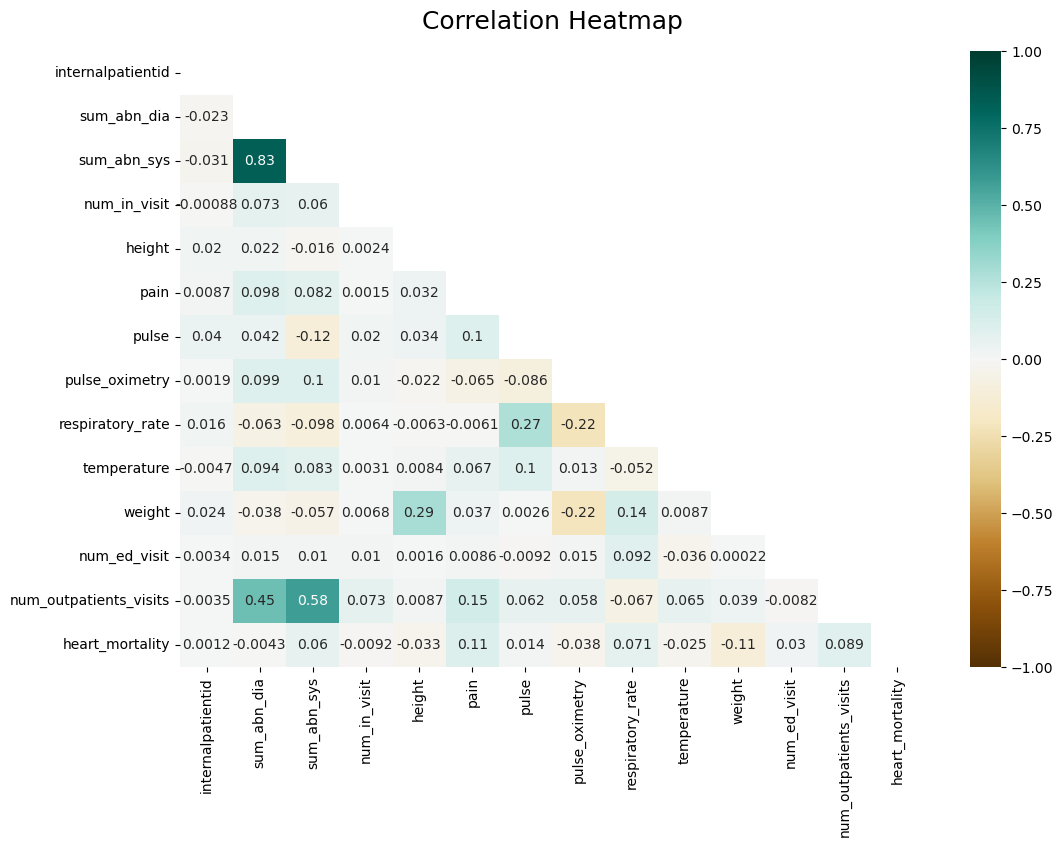

In [18]:
plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(nonhash_df.corr(), dtype=bool))
heatmap = sns.heatmap(nonhash_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.show()

## Distribution of the Non-hash features

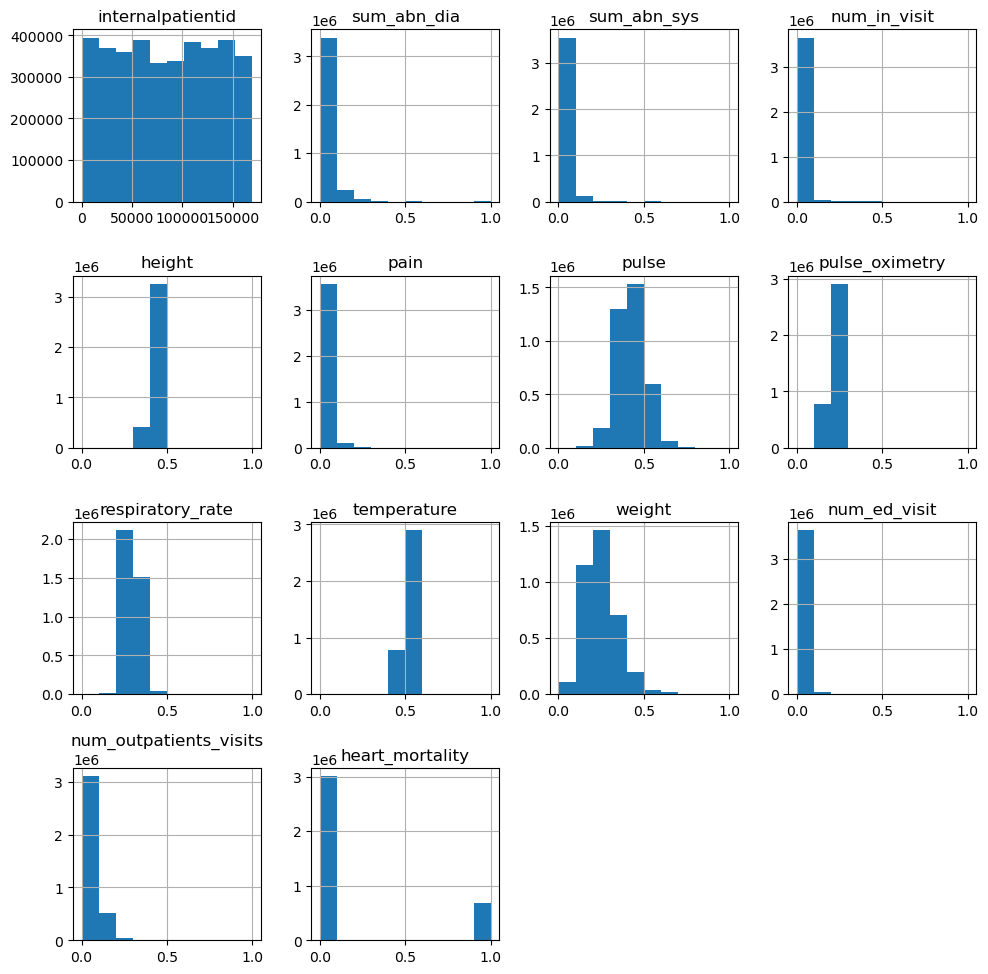

In [19]:
nonhash_df.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

## Data Visualization

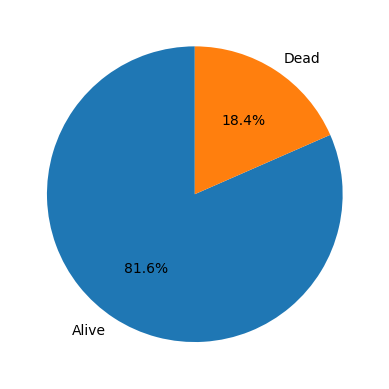

In [20]:
fig = plt.pie(df['heart_mortality'].value_counts(), labels=['Alive', 'Dead'], autopct='%1.1f%%',startangle=90)

## Feature Selection - Lasso

In [21]:
#Drop the Y from another model
df.drop(columns=['heart_related'], inplace=True)

In [22]:
X_lasso = df.drop(columns=['heart_mortality','internalpatientid'])

y_lasso = df['heart_mortality']

In [23]:
from sklearn.linear_model import LassoCV

In [24]:
# Create a LassoCV model with higher alpha value (e.g., alpha=0.1)
lasso_model = LassoCV(cv=5, alphas=[0.001])  # You can set the number of cross-validation folds

# Fit the model
lasso_model.fit(X_lasso, y_lasso)

# Get the coefficients
coefficients = lasso_model.coef_

# Create a boolean mask for selected features
selected_features_mask = coefficients == 0.000000

# Apply the mask to get the selected feature names
selected_features = X_lasso.columns[selected_features_mask]

print("Selected features:")
print(selected_features)

Selected features:
Index(['sum_abn_dia', 'sum_abn_sys', 'Heart transplant', 'Opioid ',
       'Schizophrenia, all types', 'Vascular Related', 'heart block',
       'heart disease', 'heart related', 'heart valve related',
       ...
       'furosemide', 'metoprolol', 'num_outpatients_visits', 'age_dummy_1',
       'age_dummy_2', 'age_dummy_4', 'age_dummy_6', 'age_dummy_11',
       'ruca_dummy_0', 'ruca_dummy_2'],
      dtype='object', length=116)


In [25]:
#Drop the columns with coefficients equal to 0
df = df.drop(columns=selected_features)
df = df.drop(columns=['internalpatientid'])
df

,Abnormal weight loss,Alcohol Relevnant,Anemia Relevant,Cardiac Related,Cocaine dependence,Depression,"Diabetes, all type",Dyspnea,"Hypertension, all type","Hypothyroidism, all causes",Kidney,Liver,Major depressive disorder,Malignant neoplasm,PTSD,"Pain, all types","Pneumonia, all type",Renal relevant,"Respiratory, all types",Sleep apnea,Tobacco Relevant,atrial relevant,heart failure,heart valve,hypercholesterolemia,hyperlipidemia,Male,Divorced,Separated,Widowed,White,inpatient_first_hash6,inpatient_second_hash2,inpatient_second_hash8,inpatient_second_hash13,inpatient_second_hash14,inpatient_discharge__Dummy_MEDICINE,inpatient_discharge__Dummy_NHCU,inpatient_discharge__Dummy_SURGERY,pain,weight,ed_first_hash3,acetylsalicylic acid,salbutamol,heart_mortality,age_dummy_3,age_dummy_5,age_dummy_7,age_dummy_8,age_dummy_9,age_dummy_10,age_dummy_12,ruca_dummy_1
0,0,0,1,1,0,1,1,1,1,0,1,0,0,1,0,1,1,0,1,1,1,0,1,0,0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022958,0.196451,0.0,0.0,1.0,0,0,0,1,0,0,0,0,0
1,0,0,1,1,0,1,1,1,1,0,1,0,0,1,0,1,1,0,1,1,1,0,1,0,0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022958,0.196451,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0
2,0,0,1,1,0,1,1,1,1,0,1,0,0,1,0,1,1,0,1,1,1,0,1,0,0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022958,0.196451,0.0,1.0,0.0,0,0,0,1,0,0,0,0,0
3,0,0,1,1,0,1,1,1,1,0,1,0,0,1,0,1,1,0,1,1,1,0,1,0,0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022958,0.196451,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0
4,0,0,1,1,0,1,1,1,1,0,1,0,0,1,0,1,1,0,1,1,1,0,1,0,0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022958,0.196451,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680043,1,0,1,1,0,1,1,1,1,0,1,0,1,1,1,1,1,0,1,1,0,1,1,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.053058,0.326954,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0
3680044,1,0,1,1,0,1,1,1,1,0,1,0,1,1,1,1,1,0,1,1,0,1,1,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.053058,0.326954,0.0,0.0,1.0,0,0,0,0,0,0,1,0,0
3680045,1,0,1,1,0,1,1,1,1,0,1,0,1,1,1,1,1,0,1,1,0,1,1,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.053058,0.326954,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0
3680046,1,0,1,1,0,1,1,1,1,0,1,0,1,1,1,1,1,0,1,1,0,1,1,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.053058,0.326954,0.0,1.0,0.0,0,0,0,0,0,0,1,0,0


In [26]:
#Show all the column names
all_columns = df.columns.tolist()
column_str = ", ".join([f"'{col}'" for col in all_columns])
print(column_str)

'Abnormal weight loss', 'Alcohol Relevnant', 'Anemia Relevant', 'Cardiac Related', 'Cocaine dependence', 'Depression', 'Diabetes, all type', 'Dyspnea', 'Hypertension, all type', 'Hypothyroidism, all causes', 'Kidney', 'Liver', 'Major depressive disorder ', 'Malignant neoplasm', 'PTSD', 'Pain, all types', 'Pneumonia, all type', 'Renal relevant ', 'Respiratory, all types', 'Sleep apnea', 'Tobacco Relevant', 'atrial relevant', 'heart failure', 'heart valve', 'hypercholesterolemia', 'hyperlipidemia', 'Male', 'Divorced', 'Separated', 'Widowed', 'White', 'inpatient_first_hash6', 'inpatient_second_hash2', 'inpatient_second_hash8', 'inpatient_second_hash13', 'inpatient_second_hash14', 'inpatient_discharge__Dummy_MEDICINE', 'inpatient_discharge__Dummy_NHCU', 'inpatient_discharge__Dummy_SURGERY', 'pain', 'weight', 'ed_first_hash3', 'acetylsalicylic acid', 'salbutamol', 'heart_mortality', 'age_dummy_3', 'age_dummy_5', 'age_dummy_7', 'age_dummy_8', 'age_dummy_9', 'age_dummy_10', 'age_dummy_12', 'r

In [27]:
df['heart_mortality'].value_counts()

0    3001974
1     678074
Name: heart_mortality, dtype: int64

##  Train_Validation Split

In [28]:
from sklearn.model_selection import train_test_split

# Set the X and y
X = df.drop('heart_mortality', axis=1)
y = df['heart_mortality']

# Perform train-validation split (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Fix the imbalanced Y

In [29]:
#undersample the data to fix the class imblance issue
from imblearn.under_sampling import RandomUnderSampler

# Instantiate the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Undersample the data
X_train, y_train= rus.fit_resample(X_train, y_train)

In [30]:
#check class balance
y_train.value_counts()

0    542233
1    542233
Name: heart_mortality, dtype: int64

## Model Implementation

## 1. Logistic Regression

In [31]:
from sklearn.metrics import accuracy_score, precision_recall_curve, auc, roc_auc_score, confusion_matrix

# Train the logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(fit_intercept=True)
logit.fit(X_train, y_train)

# Predict on the training set
logit_pred_train = logit.predict(X_train)

# Calculate overall accuracy on the training set
accuracy_logit_train = accuracy_score(y_train, logit_pred_train)
print("Overall accuracy on the training set is {0:.2f}".format(accuracy_logit_train))

# Calculate precision, recall, and thresholds on the training set
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, logit_pred_train)

auprc_logit_train = auc(recall_train, precision_train)
print("AUPRC on the training set is {0:.2f}".format(auprc_logit_train))

# Calculate AUROC on the training set
auroc_logit_train = roc_auc_score(y_train, logit_pred_train)
print("AUROC on the training set is {0:.2f}".format(auroc_logit_train))

# Calculate confusion matrix on the training set
confusion_matrix_train = confusion_matrix(y_train, logit_pred_train)
print("Confusion Matrix on the training set:")
print(confusion_matrix_train)

# Calculate sensitivity and specificity on the training set
TN_train, FP_train, FN_train, TP_train = confusion_matrix_train.ravel()
sensitivity_train = TP_train / (TP_train + FN_train)
specificity_train = TN_train / (TN_train + FP_train)

print("Sensitivity (True Positive Rate) on the training set: {0:.2f}".format(sensitivity_train))
print("Specificity (True Negative Rate) on the training set: {0:.2f}".format(specificity_train))

Overall accuracy on the training set is 0.66
AUPRC on the training set is 0.75
AUROC on the training set is 0.66
Confusion Matrix on the training set:
[[350429 191804]
 [172368 369865]]
Sensitivity (True Positive Rate) on the training set: 0.68
Specificity (True Negative Rate) on the training set: 0.65


In [32]:
# Predict on the validation set
logit_pred_val = logit.predict(X_val)

# Calculate overall accuracy on the validation set
accuracy_logit_val = accuracy_score(y_val, logit_pred_val)
print("Overall accuracy on the validation set is {0:.2f}".format(accuracy_logit_val))

# Calculate precision, recall, and thresholds on the validation set
precision_val, recall_val, thresholds_val = precision_recall_curve(y_val, logit_pred_val)

auprc_logit_val = auc(recall_val, precision_val)
print("AUPRC on the validation set is {0:.2f}".format(auprc_logit_val))

# Calculate AUROC on the validation set
auroc_logit_val = roc_auc_score(y_val, logit_pred_val)
print("AUROC on the validation set is {0:.2f}".format(auroc_logit_val))

# Calculate confusion matrix on the validation set
confusion_matrix_val = confusion_matrix(y_val, logit_pred_val)
print("Confusion Matrix on the validation set:")
print(confusion_matrix_val)

# Calculate sensitivity and specificity on the validation set
TN_val, FP_val, FN_val, TP_val = confusion_matrix_val.ravel()
sensitivity_val = TP_val / (TP_val + FN_val)
specificity_val = TN_val / (TN_val + FP_val)

print("Sensitivity (True Positive Rate) on the validation set: {0:.2f}".format(sensitivity_val))
print("Specificity (True Negative Rate) on the validation set: {0:.2f}".format(specificity_val))


Overall accuracy on the validation set is 0.65
AUPRC on the validation set is 0.52
AUROC on the validation set is 0.67
Confusion Matrix on the validation set:
[[388246 211923]
 [ 42984  92857]]
Sensitivity (True Positive Rate) on the validation set: 0.68
Specificity (True Negative Rate) on the validation set: 0.65


## 2. Naive Bayes 

In [33]:
from sklearn.naive_bayes import GaussianNB

# Train the Gaussian Naive Bayes model on the training set
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict on the training set
gnb_pred_train = gnb.predict(X_train)

# Calculate overall accuracy on the training set
accuracy_gnb_train = accuracy_score(y_train, gnb_pred_train)
print("Overall accuracy on the training set is {0:.2f}".format(accuracy_gnb_train))

# Calculate precision, recall, and thresholds on the training set
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, gnb_pred_train)

auprc_gnb_train = auc(recall_train, precision_train)
print("AUPRC on the training set is {0:.2f}".format(auprc_gnb_train))

# Calculate AUROC on the training set
auroc_gnb_train = roc_auc_score(y_train, gnb_pred_train)
print("AUROC on the training set is {0:.2f}".format(auroc_gnb_train))

# Calculate confusion matrix on the training set
cm_train = confusion_matrix(y_train, gnb_pred_train)
print("Confusion Matrix on the training set:")
print(cm_train)

# Calculate sensitivity and specificity on the training set
TN_train, FP_train, FN_train, TP_train = cm_train.ravel()
sensitivity_train = TP_train / (TP_train + FN_train)
specificity_train = TN_train / (TN_train + FP_train)

print("Sensitivity (True Positive Rate) on the training set: {0:.2f}".format(sensitivity_train))
print("Specificity (True Negative Rate) on the training set: {0:.2f}".format(specificity_train))

Overall accuracy on the training set is 0.64
AUPRC on the training set is 0.75
AUROC on the training set is 0.64
Confusion Matrix on the training set:
[[267577 274656]
 [119745 422488]]
Sensitivity (True Positive Rate) on the training set: 0.78
Specificity (True Negative Rate) on the training set: 0.49


In [34]:
# Predict on the validation set
gnb_pred_val = gnb.predict(X_val)

# Calculate overall accuracy on the validation set
accuracy_gnb_val = accuracy_score(y_val, gnb_pred_val)
print("Overall accuracy on the validation set is {0:.2f}".format(accuracy_gnb_val))

# Calculate precision, recall, and thresholds on the validation set
precision_val, recall_val, thresholds_val = precision_recall_curve(y_val, gnb_pred_val)

auprc_gnb_val = auc(recall_val, precision_val)
print("AUPRC on the validation set is {0:.2f}".format(auprc_gnb_val))

# Calculate AUROC on the validation set
auroc_gnb_val = roc_auc_score(y_val, gnb_pred_val)
print("AUROC on the validation set is {0:.2f}".format(auroc_gnb_val))

# Calculate confusion matrix on the validation set
cm_val = confusion_matrix(y_val, gnb_pred_val)
print("Confusion Matrix on the validation set:")
print(cm_val)

# Calculate sensitivity and specificity on the validation set
TN_val, FP_val, FN_val, TP_val = cm_val.ravel()
sensitivity_val = TP_val / (TP_val + FN_val)
specificity_val = TN_val / (TN_val + FP_val)

print("Sensitivity (True Positive Rate) on the validation set: {0:.2f}".format(sensitivity_val))
print("Specificity (True Negative Rate) on the validation set: {0:.2f}".format(specificity_val))

Overall accuracy on the validation set is 0.55
AUPRC on the validation set is 0.54
AUROC on the validation set is 0.64
Confusion Matrix on the validation set:
[[297841 302328]
 [ 29798 106043]]
Sensitivity (True Positive Rate) on the validation set: 0.78
Specificity (True Negative Rate) on the validation set: 0.50


## 3.Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest classifier on the training set
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

# Predict on the training set
rf_pred_train = rf.predict(X_train)

# Calculate overall accuracy on the training set
accuracy_rf_train = accuracy_score(y_train, rf_pred_train)
print("Overall accuracy on the training set is {0:.2f}".format(accuracy_rf_train))

# Calculate precision, recall, and thresholds on the training set
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, rf_pred_train)

auprc_rf_train = auc(recall_train, precision_train)
print("AUPRC on the training set is {0:.2f}".format(auprc_rf_train))

# Calculate AUROC on the training set
auroc_rf_train = roc_auc_score(y_train, rf_pred_train)
print("AUROC on the training set is {0:.2f}".format(auroc_rf_train))

# Calculate confusion matrix on the training set
cm_train = confusion_matrix(y_train, rf_pred_train)
print("Confusion Matrix on the training set:")
print(cm_train)

# Calculate sensitivity and specificity on the training set
TN_train, FP_train, FN_train, TP_train = cm_train.ravel()
sensitivity_train = TP_train / (TP_train + FN_train)
specificity_train = TN_train / (TN_train + FP_train)

print("Sensitivity (True Positive Rate) on the training set: {0:.2f}".format(sensitivity_train))
print("Specificity (True Negative Rate) on the training set: {0:.2f}".format(specificity_train))

Overall accuracy on the training set is 1.00
AUPRC on the training set is 1.00
AUROC on the training set is 1.00
Confusion Matrix on the training set:
[[542233      0]
 [    12 542221]]
Sensitivity (True Positive Rate) on the training set: 1.00
Specificity (True Negative Rate) on the training set: 1.00


In [36]:
# Predict on the validation set
rf_pred_val = rf.predict(X_val)

# Calculate overall accuracy on the validation set
accuracy_rf_val = accuracy_score(y_val, rf_pred_val)
print("Overall accuracy on the validation set is {0:.2f}".format(accuracy_rf_val))

# Calculate precision, recall, and thresholds on the validation set
precision_val, recall_val, thresholds_val = precision_recall_curve(y_val, rf_pred_val)

auprc_rf_val = auc(recall_val, precision_val)
print("AUPRC on the validation set is {0:.2f}".format(auprc_rf_val))

# Calculate AUROC on the validation set
auroc_rf_val = roc_auc_score(y_val, rf_pred_val)
print("AUROC on the validation set is {0:.2f}".format(auroc_rf_val))

# Calculate confusion matrix on the validation set
cm_val = confusion_matrix(y_val, rf_pred_val)
print("Confusion Matrix on the validation set:")
print(cm_val)

# Calculate sensitivity and specificity on the validation set
TN_val, FP_val, FN_val, TP_val = cm_val.ravel()
sensitivity_val = TP_val / (TP_val + FN_val)
specificity_val = TN_val / (TN_val + FP_val)

print("Sensitivity (True Positive Rate) on the validation set: {0:.2f}".format(sensitivity_val))
print("Specificity (True Negative Rate) on the validation set: {0:.2f}".format(specificity_val))

Overall accuracy on the validation set is 1.00
AUPRC on the validation set is 1.00
AUROC on the validation set is 1.00
Confusion Matrix on the validation set:
[[600134     35]
 [    48 135793]]
Sensitivity (True Positive Rate) on the validation set: 1.00
Specificity (True Negative Rate) on the validation set: 1.00


## 4. XGBoost

In [37]:
from xgboost import XGBClassifier

# Train the XGBoost classifier on the training set
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Predict on the training set
y_pred_xgb_train = xgb.predict(X_train)

# Calculate overall accuracy on the training set
accuracy_xgb_train = accuracy_score(y_train, y_pred_xgb_train)
print("Overall accuracy on the training set is {0:.2f}".format(accuracy_xgb_train))

# Calculate precision, recall, and thresholds on the training set
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, y_pred_xgb_train)

auprc_xgb_train = auc(recall_train, precision_train)
print("AUPRC on the training set is {0:.2f}".format(auprc_xgb_train))

# Calculate AUROC on the training set
auroc_xgb_train = roc_auc_score(y_train, y_pred_xgb_train)
print("AUROC on the training set is {0:.2f}".format(auroc_xgb_train))

# Calculate confusion matrix on the training set
cm_train = confusion_matrix(y_train, y_pred_xgb_train)
print("Confusion Matrix on the training set:")
print(cm_train)

# Calculate sensitivity and specificity on the training set
TN_train, FP_train, FN_train, TP_train = cm_train.ravel()
sensitivity_train = TP_train / (TP_train + FN_train)
specificity_train = TN_train / (TN_train + FP_train)

print("Sensitivity (True Positive Rate) on the training set: {0:.2f}".format(sensitivity_train))
print("Specificity (True Negative Rate) on the training set: {0:.2f}".format(specificity_train))

Overall accuracy on the training set is 0.93
AUPRC on the training set is 0.95
AUROC on the training set is 0.93
Confusion Matrix on the training set:
[[509612  32621]
 [ 41867 500366]]
Sensitivity (True Positive Rate) on the training set: 0.92
Specificity (True Negative Rate) on the training set: 0.94


In [38]:
# Predict on the validation set
y_pred_xgb_val = xgb.predict(X_val)

# Calculate overall accuracy on the validation set
accuracy_xgb_val = accuracy_score(y_val, y_pred_xgb_val)
print("Overall accuracy on the validation set is {0:.2f}".format(accuracy_xgb_val))

# Calculate precision, recall, and thresholds on the validation set
precision_val, recall_val, thresholds_val = precision_recall_curve(y_val, y_pred_xgb_val)

auprc_xgb_val = auc(recall_val, precision_val)
print("AUPRC on the validation set is {0:.2f}".format(auprc_xgb_val))

# Calculate AUROC on the validation set
auroc_xgb_val = roc_auc_score(y_val, y_pred_xgb_val)
print("AUROC on the validation set is {0:.2f}".format(auroc_xgb_val))

# Calculate confusion matrix on the validation set
cm_val = confusion_matrix(y_val, y_pred_xgb_val)
print("Confusion Matrix on the validation set:")
print(cm_val)

# Calculate sensitivity and specificity on the validation set
TN_val, FP_val, FN_val, TP_val = cm_val.ravel()
sensitivity_val = TP_val / (TP_val + FN_val)
specificity_val = TN_val / (TN_val + FP_val)

print("Sensitivity (True Positive Rate) on the validation set: {0:.2f}".format(sensitivity_val))
print("Specificity (True Negative Rate) on the validation set: {0:.2f}".format(specificity_val))

Overall accuracy on the validation set is 0.93
AUPRC on the validation set is 0.85
AUROC on the validation set is 0.93
Confusion Matrix on the validation set:
[[562967  37202]
 [ 10679 125162]]
Sensitivity (True Positive Rate) on the validation set: 0.92
Specificity (True Negative Rate) on the validation set: 0.94


## Model Comparison

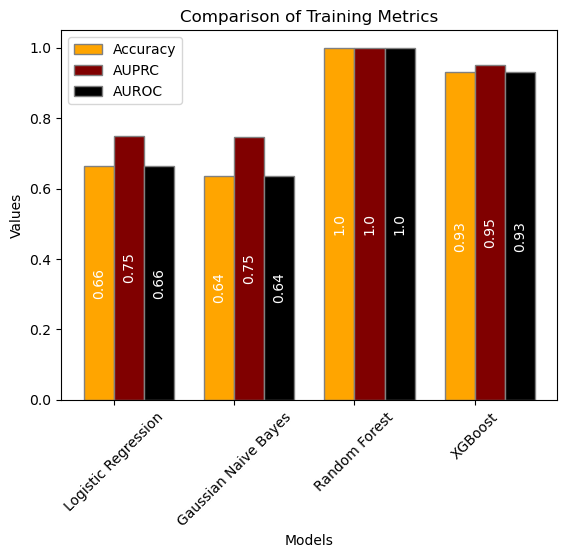

In [39]:
# Model names
model_names = ['Logistic Regression', 'Gaussian Naive Bayes', 'Random Forest', 'XGBoost']

# Accuracy values
accuracy_values = [accuracy_logit_train, accuracy_gnb_train, accuracy_rf_train, accuracy_xgb_train]

# AUPRC values
auprc_values = [auprc_logit_train, auprc_gnb_train, auprc_rf_train, auprc_xgb_train]

# AUROC values
auroc_values = [auroc_logit_train, auroc_gnb_train, auroc_rf_train, auroc_xgb_train]

# Bar width
bar_width = 0.25

# Set position of bar on X axis
r1 = np.arange(len(model_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, accuracy_values, color='orange', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, auprc_values, color='maroon', width=bar_width, edgecolor='grey', label='AUPRC')
plt.bar(r3, auroc_values, color='black', width=bar_width, edgecolor='grey', label='AUROC')

# Function to add vertical text inside the bars
def add_text(positions, values):
    for i, v in enumerate(values):
        plt.text(positions[i], v/2, str(round(v, 2)), ha='center', va='center', rotation='vertical', color='white')

# Add vertical text inside the bars
add_text(r1, accuracy_values)
add_text(r2, auprc_values)
add_text(r3, auroc_values)

plt.xlabel('Models')
plt.ylabel('Values')
plt.title('Comparison of Training Metrics')
plt.xticks([r + bar_width/2 for r in range(len(model_names))], model_names, rotation=45)

plt.legend() # Adds legend to show which color represents which metric

plt.show()


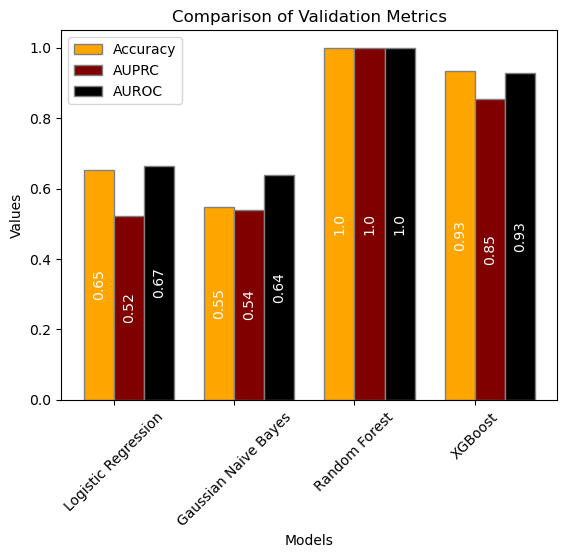

In [40]:
# Model names
model_names = ['Logistic Regression', 'Gaussian Naive Bayes', 'Random Forest', 'XGBoost']

# Accuracy values
accuracy_values = [accuracy_logit_val, accuracy_gnb_val, accuracy_rf_val, accuracy_xgb_val]

# AUPRC values
auprc_values = [auprc_logit_val, auprc_gnb_val, auprc_rf_val, auprc_xgb_val]

# AUROC values
auroc_values = [auroc_logit_val, auroc_gnb_val, auroc_rf_val, auroc_xgb_val]

# Bar width
bar_width = 0.25

# Set position of bar on X axis
r1 = np.arange(len(model_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, accuracy_values, color='orange', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, auprc_values, color='maroon', width=bar_width, edgecolor='grey', label='AUPRC')
plt.bar(r3, auroc_values, color='black', width=bar_width, edgecolor='grey', label='AUROC')

# Function to add vertical text inside the bars
def add_text(positions, values):
    for i, v in enumerate(values):
        plt.text(positions[i], v/2, str(round(v, 2)), ha='center', va='center', rotation='vertical', color='white')

# Add vertical text inside the bars
add_text(r1, accuracy_values)
add_text(r2, auprc_values)
add_text(r3, auroc_values)

plt.xlabel('Models')
plt.ylabel('Values')
plt.title('Comparison of Validation Metrics')
plt.xticks([r + bar_width/2 for r in range(len(model_names))], model_names, rotation=45)

plt.legend() # Adds legend to show which color represents which metric

plt.show()

## Test

In [41]:
test = pd.read_csv('/users/tedwen/VCHAMPS/TeamBCEagles/TeamBCEagles_Cardio_Mortality/TeamBCEagles_Cardio_Mortality_Test.csv')
test['ruca_order'] = [int(value) for value in test['ruca_order']]
test

,internalpatientid,sum_abn_dia,sum_abn_sys,Abnormal weight loss,Alcohol Relevnant,Anemia Relevant,Cardiac Related,Cocaine dependence,Depression,"Diabetes, all type",Dyspnea,Heart transplant,"Hypertension, all type","Hypothyroidism, all causes",Kidney,Liver,Major depressive disorder,Malignant neoplasm,Opioid,PTSD,"Pain, all types","Pneumonia, all type",Renal relevant,"Respiratory, all types","Schizophrenia, all types",Sleep apnea,Tobacco Relevant,Vascular Related,atrial relevant,heart block,heart disease,heart failure,heart related,heart valve,heart valve related,hypercholesterolemia,hyperlipidemia,pulmonary,ruca_order,Male,Divorced,Married,Never married,Separated,Single,Widowed,Asian,Black or African American,White,Multiracial,num_in_visit,inpatient_first_hash1,inpatient_first_hash2,inpatient_first_hash3,inpatient_first_hash4,inpatient_first_hash5,inpatient_first_hash6,inpatient_first_hash7,inpatient_first_hash8,inpatient_first_hash9,inpatient_first_hash10,inpatient_first_hash11,inpatient_first_hash12,inpatient_first_hash13,inpatient_first_hash14,inpatient_first_hash15,inpatient_first_hash16,inpatient_first_hash17,inpatient_first_hash18,inpatient_first_hash19,inpatient_first_hash20,inpatient_second_hash1,inpatient_second_hash2,inpatient_second_hash3,inpatient_second_hash4,inpatient_second_hash5,inpatient_second_hash6,inpatient_second_hash7,inpatient_second_hash8,inpatient_second_hash9,inpatient_second_hash10,inpatient_second_hash11,inpatient_second_hash12,inpatient_second_hash13,inpatient_second_hash14,inpatient_second_hash15,inpatient_second_hash16,inpatient_second_hash17,inpatient_second_hash18,inpatient_second_hash19,inpatient_second_hash20,inpatient_discharge__Dummy_BLIND REHAB,inpatient_discharge__Dummy_DOMICILIARY,inpatient_discharge__Dummy_INTERMEDIATE MED,inpatient_discharge__Dummy_MEDICINE,inpatient_discharge__Dummy_NEUROLOGY,inpatient_discharge__Dummy_NHCU,inpatient_discharge__Dummy_PSYCHIATRY,inpatient_discharge__Dummy_REHAB MEDICINE,inpatient_discharge__Dummy_SPINAL CORD INJURY,inpatient_discharge__Dummy_SURGERY,height,pain,pulse,pulse_oximetry,respiratory_rate,temperature,weight,num_ed_visit,ed_first_hash1,ed_first_hash2,ed_first_hash3,ed_first_hash4,ed_first_hash5,ed_first_hash6,ed_first_hash7,ed_first_hash8,ed_first_hash9,ed_first_hash10,ed_first_hash11,ed_first_hash12,ed_first_hash13,ed_first_hash14,ed_first_hash15,ed_first_hash16,ed_first_hash17,ed_first_hash18,ed_first_hash19,ed_first_hash20,ed_second_hash1,ed_second_hash2,ed_second_hash3,ed_second_hash4,ed_second_hash5,ed_second_hash6,ed_second_hash7,ed_second_hash8,ed_second_hash9,ed_second_hash10,ed_second_hash11,ed_second_hash12,ed_second_hash13,ed_second_hash14,ed_second_hash15,ed_second_hash16,ed_second_hash17,ed_second_hash18,ed_second_hash19,ed_second_hash20,num_medication,acetylsalicylic acid,docusate,furosemide,metoprolol,salbutamol,num_outpatients_visits,heart_related,heart_mortality,age_ordinal
0,25,38,63,0.0,0.0,15.0,0.0,0.0,0.0,0.0,1.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,12.0,9.0,0.0,0.0,0.0,0.0,2.0,2.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.176471,1.822581,72.365079,95.428571,18.612903,98.251802,366.817711,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,1.0,0.0,0.0,232.0,1.0,0.0,6
1,25,38,63,0.0,0.0,15.0,0.0,0.0,0.0,0.0,1.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,12.0,9.0,0.0,0.0,0.0,0.0,2.0,2.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [42]:
one_hot_encoded = pd.get_dummies(test['age_ordinal'], prefix='dummy')

# Add a word in front of the dummy variable columns
prefix_word = 'age'
prefixed_encoded = one_hot_encoded.add_prefix(prefix_word + '_')


# Concatenate the encoded DataFrame with the original DataFrame
test = pd.concat([test, prefixed_encoded], axis=1)

In [43]:
one_hot_encoded = pd.get_dummies(test['ruca_order'], prefix='dummy')

# Add a word in front of the dummy variable columns
prefix_word = 'ruca'
prefixed_encoded = one_hot_encoded.add_prefix(prefix_word + '_')


# Concatenate the encoded DataFrame with the original DataFrame
test = pd.concat([test, prefixed_encoded], axis=1)

In [44]:
test.drop(columns=['age_ordinal'], inplace=True)
test.drop(columns=['ruca_order'], inplace=True)
test

,internalpatientid,sum_abn_dia,sum_abn_sys,Abnormal weight loss,Alcohol Relevnant,Anemia Relevant,Cardiac Related,Cocaine dependence,Depression,"Diabetes, all type",Dyspnea,Heart transplant,"Hypertension, all type","Hypothyroidism, all causes",Kidney,Liver,Major depressive disorder,Malignant neoplasm,Opioid,PTSD,"Pain, all types","Pneumonia, all type",Renal relevant,"Respiratory, all types","Schizophrenia, all types",Sleep apnea,Tobacco Relevant,Vascular Related,atrial relevant,heart block,heart disease,heart failure,heart related,heart valve,heart valve related,hypercholesterolemia,hyperlipidemia,pulmonary,Male,Divorced,Married,Never married,Separated,Single,Widowed,Asian,Black or African American,White,Multiracial,num_in_visit,inpatient_first_hash1,inpatient_first_hash2,inpatient_first_hash3,inpatient_first_hash4,inpatient_first_hash5,inpatient_first_hash6,inpatient_first_hash7,inpatient_first_hash8,inpatient_first_hash9,inpatient_first_hash10,inpatient_first_hash11,inpatient_first_hash12,inpatient_first_hash13,inpatient_first_hash14,inpatient_first_hash15,inpatient_first_hash16,inpatient_first_hash17,inpatient_first_hash18,inpatient_first_hash19,inpatient_first_hash20,inpatient_second_hash1,inpatient_second_hash2,inpatient_second_hash3,inpatient_second_hash4,inpatient_second_hash5,inpatient_second_hash6,inpatient_second_hash7,inpatient_second_hash8,inpatient_second_hash9,inpatient_second_hash10,inpatient_second_hash11,inpatient_second_hash12,inpatient_second_hash13,inpatient_second_hash14,inpatient_second_hash15,inpatient_second_hash16,inpatient_second_hash17,inpatient_second_hash18,inpatient_second_hash19,inpatient_second_hash20,inpatient_discharge__Dummy_BLIND REHAB,inpatient_discharge__Dummy_DOMICILIARY,inpatient_discharge__Dummy_INTERMEDIATE MED,inpatient_discharge__Dummy_MEDICINE,inpatient_discharge__Dummy_NEUROLOGY,inpatient_discharge__Dummy_NHCU,inpatient_discharge__Dummy_PSYCHIATRY,inpatient_discharge__Dummy_REHAB MEDICINE,inpatient_discharge__Dummy_SPINAL CORD INJURY,inpatient_discharge__Dummy_SURGERY,height,pain,pulse,pulse_oximetry,respiratory_rate,temperature,weight,num_ed_visit,ed_first_hash1,ed_first_hash2,ed_first_hash3,ed_first_hash4,ed_first_hash5,ed_first_hash6,ed_first_hash7,ed_first_hash8,ed_first_hash9,ed_first_hash10,ed_first_hash11,ed_first_hash12,ed_first_hash13,ed_first_hash14,ed_first_hash15,ed_first_hash16,ed_first_hash17,ed_first_hash18,ed_first_hash19,ed_first_hash20,ed_second_hash1,ed_second_hash2,ed_second_hash3,ed_second_hash4,ed_second_hash5,ed_second_hash6,ed_second_hash7,ed_second_hash8,ed_second_hash9,ed_second_hash10,ed_second_hash11,ed_second_hash12,ed_second_hash13,ed_second_hash14,ed_second_hash15,ed_second_hash16,ed_second_hash17,ed_second_hash18,ed_second_hash19,ed_second_hash20,num_medication,acetylsalicylic acid,docusate,furosemide,metoprolol,salbutamol,num_outpatients_visits,heart_related,heart_mortality,age_dummy_1,age_dummy_2,age_dummy_3,age_dummy_4,age_dummy_5,age_dummy_6,age_dummy_7,age_dummy_8,age_dummy_9,age_dummy_10,age_dummy_11,age_dummy_12,ruca_dummy_0,ruca_dummy_1,ruca_dummy_2
0,25,38,63,0.0,0.0,15.0,0.0,0.0,0.0,0.0,1.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,12.0,9.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.176471,1.822581,72.365079,95.428571,18.612903,98.251802,366.817711,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,1.0,0.0,0.0,232.0,1.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,25,38,63,0.0,0.0,15.0,0.0,0.0,0.0,0.0,1.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,12.0,9.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.

In [45]:
def min_max_scale_columns(test, columns_to_scale):
    for col in columns_to_scale:
        min_value = test[col].min()
        max_value = test[col].max()
        test[col] = (test[col] - min_value) / (max_value - min_value)

    return test

In [46]:
test = min_max_scale_columns(test, columns_to_scale)
test

,internalpatientid,sum_abn_dia,sum_abn_sys,Abnormal weight loss,Alcohol Relevnant,Anemia Relevant,Cardiac Related,Cocaine dependence,Depression,"Diabetes, all type",Dyspnea,Heart transplant,"Hypertension, all type","Hypothyroidism, all causes",Kidney,Liver,Major depressive disorder,Malignant neoplasm,Opioid,PTSD,"Pain, all types","Pneumonia, all type",Renal relevant,"Respiratory, all types","Schizophrenia, all types",Sleep apnea,Tobacco Relevant,Vascular Related,atrial relevant,heart block,heart disease,heart failure,heart related,heart valve,heart valve related,hypercholesterolemia,hyperlipidemia,pulmonary,Male,Divorced,Married,Never married,Separated,Single,Widowed,Asian,Black or African American,White,Multiracial,num_in_visit,inpatient_first_hash1,inpatient_first_hash2,inpatient_first_hash3,inpatient_first_hash4,inpatient_first_hash5,inpatient_first_hash6,inpatient_first_hash7,inpatient_first_hash8,inpatient_first_hash9,inpatient_first_hash10,inpatient_first_hash11,inpatient_first_hash12,inpatient_first_hash13,inpatient_first_hash14,inpatient_first_hash15,inpatient_first_hash16,inpatient_first_hash17,inpatient_first_hash18,inpatient_first_hash19,inpatient_first_hash20,inpatient_second_hash1,inpatient_second_hash2,inpatient_second_hash3,inpatient_second_hash4,inpatient_second_hash5,inpatient_second_hash6,inpatient_second_hash7,inpatient_second_hash8,inpatient_second_hash9,inpatient_second_hash10,inpatient_second_hash11,inpatient_second_hash12,inpatient_second_hash13,inpatient_second_hash14,inpatient_second_hash15,inpatient_second_hash16,inpatient_second_hash17,inpatient_second_hash18,inpatient_second_hash19,inpatient_second_hash20,inpatient_discharge__Dummy_BLIND REHAB,inpatient_discharge__Dummy_DOMICILIARY,inpatient_discharge__Dummy_INTERMEDIATE MED,inpatient_discharge__Dummy_MEDICINE,inpatient_discharge__Dummy_NEUROLOGY,inpatient_discharge__Dummy_NHCU,inpatient_discharge__Dummy_PSYCHIATRY,inpatient_discharge__Dummy_REHAB MEDICINE,inpatient_discharge__Dummy_SPINAL CORD INJURY,inpatient_discharge__Dummy_SURGERY,height,pain,pulse,pulse_oximetry,respiratory_rate,temperature,weight,num_ed_visit,ed_first_hash1,ed_first_hash2,ed_first_hash3,ed_first_hash4,ed_first_hash5,ed_first_hash6,ed_first_hash7,ed_first_hash8,ed_first_hash9,ed_first_hash10,ed_first_hash11,ed_first_hash12,ed_first_hash13,ed_first_hash14,ed_first_hash15,ed_first_hash16,ed_first_hash17,ed_first_hash18,ed_first_hash19,ed_first_hash20,ed_second_hash1,ed_second_hash2,ed_second_hash3,ed_second_hash4,ed_second_hash5,ed_second_hash6,ed_second_hash7,ed_second_hash8,ed_second_hash9,ed_second_hash10,ed_second_hash11,ed_second_hash12,ed_second_hash13,ed_second_hash14,ed_second_hash15,ed_second_hash16,ed_second_hash17,ed_second_hash18,ed_second_hash19,ed_second_hash20,num_medication,acetylsalicylic acid,docusate,furosemide,metoprolol,salbutamol,num_outpatients_visits,heart_related,heart_mortality,age_dummy_1,age_dummy_2,age_dummy_3,age_dummy_4,age_dummy_5,age_dummy_6,age_dummy_7,age_dummy_8,age_dummy_9,age_dummy_10,age_dummy_11,age_dummy_12,ruca_dummy_0,ruca_dummy_1,ruca_dummy_2
0,25,0.015097,0.008978,0.0,0.0,15.0,0.0,0.0,0.0,0.0,1.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,12.0,9.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.533106,0.025852,0.424472,0.512754,0.425610,0.144950,0.644443,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,1.0,0.0,0.0,0.020654,1.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,25,0.015097,0.008978,0.0,0.0,15.0,0.0,0.0,0.0,0.0,1.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,12.0,9.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.

In [47]:
def convert_to_binary(test, columns):

    for col in columns:
        test[col] = (test[col] != 0).astype(int)
    return test


columns_to_convert = ['Abnormal weight loss','Alcohol Relevnant','Anemia Relevant','Cardiac Related','Cocaine dependence','Depression','Diabetes, all type','Dyspnea','Heart transplant','Hypertension, all type','Hypothyroidism, all causes',
'Kidney','Liver','Major depressive disorder ','Malignant neoplasm','Opioid ','PTSD','Pain, all types','Pneumonia, all type','Renal relevant ','Respiratory, all types','Schizophrenia, all types','Sleep apnea','Tobacco Relevant','Vascular Related',
'atrial relevant','heart block','heart disease','heart failure','heart related','heart valve','heart valve related','hypercholesterolemia','hyperlipidemia','pulmonary']
test = convert_to_binary(test, columns_to_convert)
test

,internalpatientid,sum_abn_dia,sum_abn_sys,Abnormal weight loss,Alcohol Relevnant,Anemia Relevant,Cardiac Related,Cocaine dependence,Depression,"Diabetes, all type",Dyspnea,Heart transplant,"Hypertension, all type","Hypothyroidism, all causes",Kidney,Liver,Major depressive disorder,Malignant neoplasm,Opioid,PTSD,"Pain, all types","Pneumonia, all type",Renal relevant,"Respiratory, all types","Schizophrenia, all types",Sleep apnea,Tobacco Relevant,Vascular Related,atrial relevant,heart block,heart disease,heart failure,heart related,heart valve,heart valve related,hypercholesterolemia,hyperlipidemia,pulmonary,Male,Divorced,Married,Never married,Separated,Single,Widowed,Asian,Black or African American,White,Multiracial,num_in_visit,inpatient_first_hash1,inpatient_first_hash2,inpatient_first_hash3,inpatient_first_hash4,inpatient_first_hash5,inpatient_first_hash6,inpatient_first_hash7,inpatient_first_hash8,inpatient_first_hash9,inpatient_first_hash10,inpatient_first_hash11,inpatient_first_hash12,inpatient_first_hash13,inpatient_first_hash14,inpatient_first_hash15,inpatient_first_hash16,inpatient_first_hash17,inpatient_first_hash18,inpatient_first_hash19,inpatient_first_hash20,inpatient_second_hash1,inpatient_second_hash2,inpatient_second_hash3,inpatient_second_hash4,inpatient_second_hash5,inpatient_second_hash6,inpatient_second_hash7,inpatient_second_hash8,inpatient_second_hash9,inpatient_second_hash10,inpatient_second_hash11,inpatient_second_hash12,inpatient_second_hash13,inpatient_second_hash14,inpatient_second_hash15,inpatient_second_hash16,inpatient_second_hash17,inpatient_second_hash18,inpatient_second_hash19,inpatient_second_hash20,inpatient_discharge__Dummy_BLIND REHAB,inpatient_discharge__Dummy_DOMICILIARY,inpatient_discharge__Dummy_INTERMEDIATE MED,inpatient_discharge__Dummy_MEDICINE,inpatient_discharge__Dummy_NEUROLOGY,inpatient_discharge__Dummy_NHCU,inpatient_discharge__Dummy_PSYCHIATRY,inpatient_discharge__Dummy_REHAB MEDICINE,inpatient_discharge__Dummy_SPINAL CORD INJURY,inpatient_discharge__Dummy_SURGERY,height,pain,pulse,pulse_oximetry,respiratory_rate,temperature,weight,num_ed_visit,ed_first_hash1,ed_first_hash2,ed_first_hash3,ed_first_hash4,ed_first_hash5,ed_first_hash6,ed_first_hash7,ed_first_hash8,ed_first_hash9,ed_first_hash10,ed_first_hash11,ed_first_hash12,ed_first_hash13,ed_first_hash14,ed_first_hash15,ed_first_hash16,ed_first_hash17,ed_first_hash18,ed_first_hash19,ed_first_hash20,ed_second_hash1,ed_second_hash2,ed_second_hash3,ed_second_hash4,ed_second_hash5,ed_second_hash6,ed_second_hash7,ed_second_hash8,ed_second_hash9,ed_second_hash10,ed_second_hash11,ed_second_hash12,ed_second_hash13,ed_second_hash14,ed_second_hash15,ed_second_hash16,ed_second_hash17,ed_second_hash18,ed_second_hash19,ed_second_hash20,num_medication,acetylsalicylic acid,docusate,furosemide,metoprolol,salbutamol,num_outpatients_visits,heart_related,heart_mortality,age_dummy_1,age_dummy_2,age_dummy_3,age_dummy_4,age_dummy_5,age_dummy_6,age_dummy_7,age_dummy_8,age_dummy_9,age_dummy_10,age_dummy_11,age_dummy_12,ruca_dummy_0,ruca_dummy_1,ruca_dummy_2
0,25,0.015097,0.008978,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.533106,0.025852,0.424472,0.512754,0.425610,0.144950,0.644443,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,1.0,0.0,0.0,0.020654,1.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,25,0.015097,0.008978,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [48]:
test = test.set_index('internalpatientid', append=True)
test

,,sum_abn_dia,sum_abn_sys,Abnormal weight loss,Alcohol Relevnant,Anemia Relevant,Cardiac Related,Cocaine dependence,Depression,"Diabetes, all type",Dyspnea,Heart transplant,"Hypertension, all type","Hypothyroidism, all causes",Kidney,Liver,Major depressive disorder,Malignant neoplasm,Opioid,PTSD,"Pain, all types","Pneumonia, all type",Renal relevant,"Respiratory, all types","Schizophrenia, all types",Sleep apnea,Tobacco Relevant,Vascular Related,atrial relevant,heart block,heart disease,heart failure,heart related,heart valve,heart valve related,hypercholesterolemia,hyperlipidemia,pulmonary,Male,Divorced,Married,Never married,Separated,Single,Widowed,Asian,Black or African American,White,Multiracial,num_in_visit,inpatient_first_hash1,inpatient_first_hash2,inpatient_first_hash3,inpatient_first_hash4,inpatient_first_hash5,inpatient_first_hash6,inpatient_first_hash7,inpatient_first_hash8,inpatient_first_hash9,inpatient_first_hash10,inpatient_first_hash11,inpatient_first_hash12,inpatient_first_hash13,inpatient_first_hash14,inpatient_first_hash15,inpatient_first_hash16,inpatient_first_hash17,inpatient_first_hash18,inpatient_first_hash19,inpatient_first_hash20,inpatient_second_hash1,inpatient_second_hash2,inpatient_second_hash3,inpatient_second_hash4,inpatient_second_hash5,inpatient_second_hash6,inpatient_second_hash7,inpatient_second_hash8,inpatient_second_hash9,inpatient_second_hash10,inpatient_second_hash11,inpatient_second_hash12,inpatient_second_hash13,inpatient_second_hash14,inpatient_second_hash15,inpatient_second_hash16,inpatient_second_hash17,inpatient_second_hash18,inpatient_second_hash19,inpatient_second_hash20,inpatient_discharge__Dummy_BLIND REHAB,inpatient_discharge__Dummy_DOMICILIARY,inpatient_discharge__Dummy_INTERMEDIATE MED,inpatient_discharge__Dummy_MEDICINE,inpatient_discharge__Dummy_NEUROLOGY,inpatient_discharge__Dummy_NHCU,inpatient_discharge__Dummy_PSYCHIATRY,inpatient_discharge__Dummy_REHAB MEDICINE,inpatient_discharge__Dummy_SPINAL CORD INJURY,inpatient_discharge__Dummy_SURGERY,height,pain,pulse,pulse_oximetry,respiratory_rate,temperature,weight,num_ed_visit,ed_first_hash1,ed_first_hash2,ed_first_hash3,ed_first_hash4,ed_first_hash5,ed_first_hash6,ed_first_hash7,ed_first_hash8,ed_first_hash9,ed_first_hash10,ed_first_hash11,ed_first_hash12,ed_first_hash13,ed_first_hash14,ed_first_hash15,ed_first_hash16,ed_first_hash17,ed_first_hash18,ed_first_hash19,ed_first_hash20,ed_second_hash1,ed_second_hash2,ed_second_hash3,ed_second_hash4,ed_second_hash5,ed_second_hash6,ed_second_hash7,ed_second_hash8,ed_second_hash9,ed_second_hash10,ed_second_hash11,ed_second_hash12,ed_second_hash13,ed_second_hash14,ed_second_hash15,ed_second_hash16,ed_second_hash17,ed_second_hash18,ed_second_hash19,ed_second_hash20,num_medication,acetylsalicylic acid,docusate,furosemide,metoprolol,salbutamol,num_outpatients_visits,heart_related,heart_mortality,age_dummy_1,age_dummy_2,age_dummy_3,age_dummy_4,age_dummy_5,age_dummy_6,age_dummy_7,age_dummy_8,age_dummy_9,age_dummy_10,age_dummy_11,age_dummy_12,ruca_dummy_0,ruca_dummy_1,ruca_dummy_2
,internalpatientid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,25,0.015097,0.008978,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.533106,0.025852,0.424472,0.512754,0.425610,0.144950,0.644443,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,1.0,0.0,0.0,0.020654,1.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,25,0.015097,0.008978,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,1.0

In [49]:
common_columns = df.columns.intersection(test.columns)

In [50]:
test_2 = test[common_columns]
test_2

,,Abnormal weight loss,Alcohol Relevnant,Anemia Relevant,Cardiac Related,Cocaine dependence,Depression,"Diabetes, all type",Dyspnea,"Hypertension, all type","Hypothyroidism, all causes",Kidney,Liver,Major depressive disorder,Malignant neoplasm,PTSD,"Pain, all types","Pneumonia, all type",Renal relevant,"Respiratory, all types",Sleep apnea,Tobacco Relevant,atrial relevant,heart failure,heart valve,hypercholesterolemia,hyperlipidemia,Male,Divorced,Separated,Widowed,White,inpatient_first_hash6,inpatient_second_hash2,inpatient_second_hash8,inpatient_second_hash13,inpatient_second_hash14,inpatient_discharge__Dummy_MEDICINE,inpatient_discharge__Dummy_NHCU,inpatient_discharge__Dummy_SURGERY,pain,weight,ed_first_hash3,acetylsalicylic acid,salbutamol,heart_mortality,age_dummy_3,age_dummy_5,age_dummy_7,age_dummy_8,age_dummy_9,age_dummy_10,age_dummy_12,ruca_dummy_1
,internalpatientid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,25,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025852,0.644443,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
1,25,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025852,0.644443,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
2,25,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025852,0.644443,-1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
3,25,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025852,0.644443,-1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
4,25,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.025852,0.644443,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961524,166249,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,0,1,0,0,1,1,0,0,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001509,0.255130,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0
961525,168650,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.001576,0.257155,-1.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0
961526,168650,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.001576,0.257155,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0


In [51]:
X_test = test_2.drop(columns=['heart_mortality'])
y_test = test_2['heart_mortality']

In [52]:
test_predictions_1 = rf.predict(X_test)

In [53]:
# Calculate overall accuracy
accuracy_rf = accuracy_score(y_test, test_predictions_1)
print("Overall accuracy is {0:.2f}".format(accuracy_rf))

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, test_predictions_1)

auprc_rf = auc(recall, precision)
print("AUPRC is {0:.2f}".format(auprc_rf))

# Calculate AUROC
auroc_rf = roc_auc_score(y_test, test_predictions_1)
print("AUROC is {0:.2f}".format(auroc_rf))

# Calculate confusion matrix
confusion_matrix3 = confusion_matrix(y_test, test_predictions_1)
print("Confusion Matrix:")
print(confusion_matrix3)

# Calculate sensitivity and specificity
TN, FP, FN, TP = confusion_matrix3.ravel()
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Sensitivity (True Positive Rate): {0:.2f}".format(sensitivity))
print("Specificity (True Negative Rate): {0:.2f}".format(specificity))

Overall accuracy is 0.82
AUPRC is 0.25
AUROC is 0.52
Confusion Matrix:
[[776661  25218]
 [149527  10123]]
Sensitivity (True Positive Rate): 0.06
Specificity (True Negative Rate): 0.97


In [54]:
validation_predictions_2 = xgb.predict(X_test)

In [55]:
# Calculate overall accuracy
accuracy_xgb = accuracy_score(y_test, validation_predictions_2)
print("Overall accuracy is {0:.2f}".format(accuracy_xgb))

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, validation_predictions_2)

auprc_xgb = auc(recall, precision)
print("AUPRC is {0:.2f}".format(auprc_xgb))

# Calculate AUROC
auroc_xgb = roc_auc_score(y_test, validation_predictions_2)
print("AUROC is {0:.2f}".format(auroc_xgb))

# Calculate confusion matrix
confusion_matrix4 = confusion_matrix(y_test, validation_predictions_2)
print("Confusion Matrix:")
print(confusion_matrix4)

# Calculate sensitivity and specificity
TN, FP, FN, TP = confusion_matrix4.ravel()
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Sensitivity (True Positive Rate): {0:.2f}".format(sensitivity))
print("Specificity (True Negative Rate): {0:.2f}".format(specificity))

Overall accuracy is 0.70
AUPRC is 0.32
AUROC is 0.54
Confusion Matrix:
[[627381 174498]
 [111860  47790]]
Sensitivity (True Positive Rate): 0.30
Specificity (True Negative Rate): 0.78


## Test Model Comparison

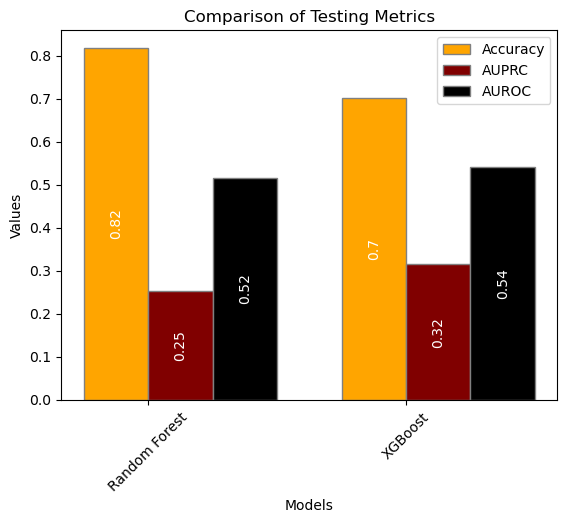

In [56]:
# Model names
model_names = ['Random Forest', 'XGBoost']

# Accuracy values
accuracy_values = [accuracy_rf, accuracy_xgb]

# AUPRC values
auprc_values = [auprc_rf, auprc_xgb]

# AUROC values
auroc_values = [auroc_rf, auroc_xgb]

# Bar width
bar_width = 0.25

# Set position of bar on X axis
r1 = np.arange(len(model_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, accuracy_values, color='orange', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, auprc_values, color='maroon', width=bar_width, edgecolor='grey', label='AUPRC')
plt.bar(r3, auroc_values, color='black', width=bar_width, edgecolor='grey', label='AUROC')

# Function to add vertical text inside the bars
def add_text(positions, values):
    for i, v in enumerate(values):
        plt.text(positions[i], v/2, str(round(v, 2)), ha='center', va='center', rotation='vertical', color='white')

# Add vertical text inside the bars
add_text(r1, accuracy_values)
add_text(r2, auprc_values)
add_text(r3, auroc_values)

plt.xlabel('Models')
plt.ylabel('Values')
plt.title('Comparison of Testing Metrics')
plt.xticks([r + bar_width/2 for r in range(len(model_names))], model_names, rotation=45)

plt.legend() # Adds legend to show which color represents which metric

plt.show()

Based on training and validation results, we determine that Random Forest is the best performing model and will be used for the Quality Check (test) set.

In [57]:
# Get the predicted probabilities for the positive class (class 1)
proba_positive_class = rf.predict_proba(X_test)[:, 1]

# Thresholding for binary prediction
threshold = 0.5
binary_predictions = (proba_positive_class >= threshold).astype(int)

# Format the probability values to display three decimal places
proba_positive_class_formatted = [f"{prob:.3f}" for prob in proba_positive_class]

# Create a DataFrame to store the results
result_df = pd.DataFrame({'binary_prediction': binary_predictions, 'probability': proba_positive_class_formatted})

# Print the DataFrame if needed
print(result_df)

        binary_prediction probability
0                       0       0.000
1                       0       0.000
2                       0       0.100
3                       0       0.100
4                       0       0.000
...                   ...         ...
961524                  0       0.200
961525                  0       0.300
961526                  0       0.300
961527                  0       0.200
961528                  0       0.200

[961529 rows x 2 columns]


In [58]:
test_2['qc_prob'] = proba_positive_class_formatted
test_2['qc_pred'] = binary_predictions
test_2 = test_2[['qc_pred', 'qc_prob']]
test_2

,,qc_pred,qc_prob
,internalpatientid,,
0,25,0,0.000
1,25,0,0.000
2,25,0,0.100
3,25,0,0.100
4,25,0,0.000
...,...,...,...
961524,166249,0,0.200
961525,168650,0,0.300
961526,168650,0,0.300


In [59]:
# Reset the index to move "internalpatientid" back as a column
test_2.reset_index(inplace=True)

# Group by "internalpatientid" and aggregate "qc_pred" using custom logic
def aggregate_test_pred(test_pred_values):
    return 1 if any(test_pred_values == 1) else test_pred_values.iloc[0]

# Group by "internalpatientid" and aggregate "qc_prob" using custom logic
def aggregate_test_prob(test_prob_values):
    return max(test_prob_values)

# Perform group-wise aggregation on "qc_pred"
aggregated_test_pred_df = test_2.groupby("internalpatientid")["qc_pred"].agg(aggregate_test_pred)

# Perform group-wise aggregation on "qc_prob"
aggregated_test_prob_df = test_2.groupby("internalpatientid")["qc_prob"].agg(aggregate_test_prob)

# Create a new DataFrame with the aggregated results
test_2 = pd.DataFrame({"Binary": aggregated_test_pred_df, "Continuous": aggregated_test_prob_df})

test_2

,Binary,Continuous
internalpatientid,,
25,0,0.200
41,0,0.200
59,0,0.000
109,0,0.000
110,1,0.500
...,...,...
168905,0,0.300
168914,0,0.300
168915,1,0.700


In [60]:
test_2.to_csv('/users/tedwen/VCHAMPS/cardio_test_output.csv')

## Quality Check

In [61]:
qc = pd.read_csv('/users/tedwen/VCHAMPS/TeamBCEagles/TeamBCEagles_Cardio_Mortality/TeamBCEagles_Cardio_Mortality_QC.csv')
qc['ruca_order'] = [int(value) for value in qc['ruca_order']]
qc

,internalpatientid,sum_abn_dia,sum_abn_sys,Abnormal weight loss,Alcohol Relevnant,Anemia Relevant,Cardiac Related,Cocaine dependence,Depression,"Diabetes, all type",Dyspnea,Heart transplant,"Hypertension, all type","Hypothyroidism, all causes",Kidney,Liver,Major depressive disorder,Malignant neoplasm,Opioid,PTSD,"Pain, all types","Pneumonia, all type",Renal relevant,"Respiratory, all types","Schizophrenia, all types",Sleep apnea,Tobacco Relevant,Vascular Related,atrial relevant,heart block,heart disease,heart failure,heart related,heart valve,heart valve related,hypercholesterolemia,hyperlipidemia,pulmonary,ruca_order,Male,Divorced,Married,Never married,Separated,Unknown,Widowed,Asian,Black or African American,White,Multiracial,num_in_visit,inpatient_first_hash1,inpatient_first_hash2,inpatient_first_hash3,inpatient_first_hash4,inpatient_first_hash5,inpatient_first_hash6,inpatient_first_hash7,inpatient_first_hash8,inpatient_first_hash9,inpatient_first_hash10,inpatient_first_hash11,inpatient_first_hash12,inpatient_first_hash13,inpatient_first_hash14,inpatient_first_hash15,inpatient_first_hash16,inpatient_first_hash17,inpatient_first_hash18,inpatient_first_hash19,inpatient_first_hash20,inpatient_second_hash1,inpatient_second_hash2,inpatient_second_hash3,inpatient_second_hash4,inpatient_second_hash5,inpatient_second_hash6,inpatient_second_hash7,inpatient_second_hash8,inpatient_second_hash9,inpatient_second_hash10,inpatient_second_hash11,inpatient_second_hash12,inpatient_second_hash13,inpatient_second_hash14,inpatient_second_hash15,inpatient_second_hash16,inpatient_second_hash17,inpatient_second_hash18,inpatient_second_hash19,inpatient_second_hash20,inpatient_discharge__Dummy_BLIND REHAB,inpatient_discharge__Dummy_DOMICILIARY,inpatient_discharge__Dummy_INTERMEDIATE MED,inpatient_discharge__Dummy_MEDICINE,inpatient_discharge__Dummy_NEUROLOGY,inpatient_discharge__Dummy_NHCU,inpatient_discharge__Dummy_PSYCHIATRY,inpatient_discharge__Dummy_REHAB MEDICINE,inpatient_discharge__Dummy_SPINAL CORD INJURY,inpatient_discharge__Dummy_SURGERY,num_ed_visit,ed_first_hash1,ed_first_hash2,ed_first_hash3,ed_first_hash4,ed_first_hash5,ed_first_hash6,ed_first_hash7,ed_first_hash8,ed_first_hash9,ed_first_hash10,ed_first_hash11,ed_first_hash12,ed_first_hash13,ed_first_hash14,ed_first_hash15,ed_first_hash16,ed_first_hash17,ed_first_hash18,ed_first_hash19,ed_first_hash20,ed_second_hash1,ed_second_hash2,ed_second_hash3,ed_second_hash4,ed_second_hash5,ed_second_hash6,ed_second_hash7,ed_second_hash8,ed_second_hash9,ed_second_hash10,ed_second_hash11,ed_second_hash12,ed_second_hash13,ed_second_hash14,ed_second_hash15,ed_second_hash16,ed_second_hash17,ed_second_hash18,ed_second_hash19,ed_second_hash20,pain,pulse,respiratory_rate,temperature,pulse_oximetry,weight,height,num_medication,acetylsalicylic acid,docusate,furosemide,metoprolol,salbutamol,num_outpatients_visits,age_ordinal
0,137771,29,26,0,19,0,15,0,14,0,0,0,5,0,2,0,0,0,0,81,12,0,0,0,0,5,5,0,0,0,0,41,0,0,0,0,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.964286,80.871795,17.037037,98.468264,97.586207,232.257642,70.666667,2.0,0.0,0.0,1.0,0.0,0.0,404,2
1,137771,29,26,0,19,0,15,0,14,0,0,0,5,0,2,0,0,0,0,81,12,0,0,0,0,5,5,0,0,0,0,41,0,0,0,0,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [62]:
one_hot_encoded = pd.get_dummies(qc['age_ordinal'], prefix='dummy')

# Add a word in front of the dummy variable columns
prefix_word = 'age'
prefixed_encoded = one_hot_encoded.add_prefix(prefix_word + '_')


# Concatenate the encoded DataFrame with the original DataFrame
qc = pd.concat([qc, prefixed_encoded], axis=1)

In [63]:
one_hot_encoded = pd.get_dummies(qc['ruca_order'], prefix='dummy')

# Add a word in front of the dummy variable columns
prefix_word = 'ruca'
prefixed_encoded = one_hot_encoded.add_prefix(prefix_word + '_')


# Concatenate the encoded DataFrame with the original DataFrame
qc = pd.concat([qc, prefixed_encoded], axis=1)

In [64]:
def min_max_scale_columns(qc, columns_to_scale):
    for col in columns_to_scale:
        min_value = qc[col].min()
        max_value = qc[col].max()
        qc[col] = (qc[col] - min_value) / (max_value - min_value)

    return qc

In [65]:
qc = min_max_scale_columns(qc, columns_to_scale)
qc

,internalpatientid,sum_abn_dia,sum_abn_sys,Abnormal weight loss,Alcohol Relevnant,Anemia Relevant,Cardiac Related,Cocaine dependence,Depression,"Diabetes, all type",Dyspnea,Heart transplant,"Hypertension, all type","Hypothyroidism, all causes",Kidney,Liver,Major depressive disorder,Malignant neoplasm,Opioid,PTSD,"Pain, all types","Pneumonia, all type",Renal relevant,"Respiratory, all types","Schizophrenia, all types",Sleep apnea,Tobacco Relevant,Vascular Related,atrial relevant,heart block,heart disease,heart failure,heart related,heart valve,heart valve related,hypercholesterolemia,hyperlipidemia,pulmonary,ruca_order,Male,Divorced,Married,Never married,Separated,Unknown,Widowed,Asian,Black or African American,White,Multiracial,num_in_visit,inpatient_first_hash1,inpatient_first_hash2,inpatient_first_hash3,inpatient_first_hash4,inpatient_first_hash5,inpatient_first_hash6,inpatient_first_hash7,inpatient_first_hash8,inpatient_first_hash9,inpatient_first_hash10,inpatient_first_hash11,inpatient_first_hash12,inpatient_first_hash13,inpatient_first_hash14,inpatient_first_hash15,inpatient_first_hash16,inpatient_first_hash17,inpatient_first_hash18,inpatient_first_hash19,inpatient_first_hash20,inpatient_second_hash1,inpatient_second_hash2,inpatient_second_hash3,inpatient_second_hash4,inpatient_second_hash5,inpatient_second_hash6,inpatient_second_hash7,inpatient_second_hash8,inpatient_second_hash9,inpatient_second_hash10,inpatient_second_hash11,inpatient_second_hash12,inpatient_second_hash13,inpatient_second_hash14,inpatient_second_hash15,inpatient_second_hash16,inpatient_second_hash17,inpatient_second_hash18,inpatient_second_hash19,inpatient_second_hash20,inpatient_discharge__Dummy_BLIND REHAB,inpatient_discharge__Dummy_DOMICILIARY,inpatient_discharge__Dummy_INTERMEDIATE MED,inpatient_discharge__Dummy_MEDICINE,inpatient_discharge__Dummy_NEUROLOGY,inpatient_discharge__Dummy_NHCU,inpatient_discharge__Dummy_PSYCHIATRY,inpatient_discharge__Dummy_REHAB MEDICINE,inpatient_discharge__Dummy_SPINAL CORD INJURY,inpatient_discharge__Dummy_SURGERY,num_ed_visit,ed_first_hash1,ed_first_hash2,ed_first_hash3,ed_first_hash4,ed_first_hash5,ed_first_hash6,ed_first_hash7,ed_first_hash8,ed_first_hash9,ed_first_hash10,ed_first_hash11,ed_first_hash12,ed_first_hash13,ed_first_hash14,ed_first_hash15,ed_first_hash16,ed_first_hash17,ed_first_hash18,ed_first_hash19,ed_first_hash20,ed_second_hash1,ed_second_hash2,ed_second_hash3,ed_second_hash4,ed_second_hash5,ed_second_hash6,ed_second_hash7,ed_second_hash8,ed_second_hash9,ed_second_hash10,ed_second_hash11,ed_second_hash12,ed_second_hash13,ed_second_hash14,ed_second_hash15,ed_second_hash16,ed_second_hash17,ed_second_hash18,ed_second_hash19,ed_second_hash20,pain,pulse,respiratory_rate,temperature,pulse_oximetry,weight,height,num_medication,acetylsalicylic acid,docusate,furosemide,metoprolol,salbutamol,num_outpatients_visits,age_ordinal,age_dummy_2,age_dummy_3,age_dummy_4,age_dummy_5,age_dummy_6,age_dummy_7,age_dummy_8,age_dummy_9,age_dummy_10,age_dummy_11,age_dummy_12,ruca_dummy_0,ruca_dummy_1,ruca_dummy_2
0,137771,0.086310,0.014773,0,19,0,15,0,14,0,0,0,5,0,2,0,0,0,0,81,12,0,0,0,0,5,5,0,0,0,0,41,0,0,0,0,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.124284,0.520442,0.187981,0.748799,0.803714,0.387125,0.549550,2.0,0.0,0.0,1.0,0.0,0.0,0.103511,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,137771,0.086310,0.014773,0,19,0,15,0,14,0,0,0,5,0,2,0,0,0,0,81,12,0,0,0,0,5,5,0,0,0,0,41,0,0,0,0,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [66]:
def convert_to_binary(qc, columns):

    for col in columns:
        qc[col] = (qc[col] != 0).astype(int)
    return qc

columns_to_convert = ['Abnormal weight loss','Alcohol Relevnant','Anemia Relevant','Cardiac Related','Cocaine dependence','Depression','Diabetes, all type','Dyspnea','Heart transplant','Hypertension, all type','Hypothyroidism, all causes',
'Kidney','Liver','Major depressive disorder ','Malignant neoplasm','Opioid ','PTSD','Pain, all types','Pneumonia, all type','Renal relevant ','Respiratory, all types','Schizophrenia, all types','Sleep apnea','Tobacco Relevant','Vascular Related',
'atrial relevant','heart block','heart disease','heart failure','heart related','heart valve','heart valve related','hypercholesterolemia','hyperlipidemia','pulmonary']
qc = convert_to_binary(qc, columns_to_convert)
qc

,internalpatientid,sum_abn_dia,sum_abn_sys,Abnormal weight loss,Alcohol Relevnant,Anemia Relevant,Cardiac Related,Cocaine dependence,Depression,"Diabetes, all type",Dyspnea,Heart transplant,"Hypertension, all type","Hypothyroidism, all causes",Kidney,Liver,Major depressive disorder,Malignant neoplasm,Opioid,PTSD,"Pain, all types","Pneumonia, all type",Renal relevant,"Respiratory, all types","Schizophrenia, all types",Sleep apnea,Tobacco Relevant,Vascular Related,atrial relevant,heart block,heart disease,heart failure,heart related,heart valve,heart valve related,hypercholesterolemia,hyperlipidemia,pulmonary,ruca_order,Male,Divorced,Married,Never married,Separated,Unknown,Widowed,Asian,Black or African American,White,Multiracial,num_in_visit,inpatient_first_hash1,inpatient_first_hash2,inpatient_first_hash3,inpatient_first_hash4,inpatient_first_hash5,inpatient_first_hash6,inpatient_first_hash7,inpatient_first_hash8,inpatient_first_hash9,inpatient_first_hash10,inpatient_first_hash11,inpatient_first_hash12,inpatient_first_hash13,inpatient_first_hash14,inpatient_first_hash15,inpatient_first_hash16,inpatient_first_hash17,inpatient_first_hash18,inpatient_first_hash19,inpatient_first_hash20,inpatient_second_hash1,inpatient_second_hash2,inpatient_second_hash3,inpatient_second_hash4,inpatient_second_hash5,inpatient_second_hash6,inpatient_second_hash7,inpatient_second_hash8,inpatient_second_hash9,inpatient_second_hash10,inpatient_second_hash11,inpatient_second_hash12,inpatient_second_hash13,inpatient_second_hash14,inpatient_second_hash15,inpatient_second_hash16,inpatient_second_hash17,inpatient_second_hash18,inpatient_second_hash19,inpatient_second_hash20,inpatient_discharge__Dummy_BLIND REHAB,inpatient_discharge__Dummy_DOMICILIARY,inpatient_discharge__Dummy_INTERMEDIATE MED,inpatient_discharge__Dummy_MEDICINE,inpatient_discharge__Dummy_NEUROLOGY,inpatient_discharge__Dummy_NHCU,inpatient_discharge__Dummy_PSYCHIATRY,inpatient_discharge__Dummy_REHAB MEDICINE,inpatient_discharge__Dummy_SPINAL CORD INJURY,inpatient_discharge__Dummy_SURGERY,num_ed_visit,ed_first_hash1,ed_first_hash2,ed_first_hash3,ed_first_hash4,ed_first_hash5,ed_first_hash6,ed_first_hash7,ed_first_hash8,ed_first_hash9,ed_first_hash10,ed_first_hash11,ed_first_hash12,ed_first_hash13,ed_first_hash14,ed_first_hash15,ed_first_hash16,ed_first_hash17,ed_first_hash18,ed_first_hash19,ed_first_hash20,ed_second_hash1,ed_second_hash2,ed_second_hash3,ed_second_hash4,ed_second_hash5,ed_second_hash6,ed_second_hash7,ed_second_hash8,ed_second_hash9,ed_second_hash10,ed_second_hash11,ed_second_hash12,ed_second_hash13,ed_second_hash14,ed_second_hash15,ed_second_hash16,ed_second_hash17,ed_second_hash18,ed_second_hash19,ed_second_hash20,pain,pulse,respiratory_rate,temperature,pulse_oximetry,weight,height,num_medication,acetylsalicylic acid,docusate,furosemide,metoprolol,salbutamol,num_outpatients_visits,age_ordinal,age_dummy_2,age_dummy_3,age_dummy_4,age_dummy_5,age_dummy_6,age_dummy_7,age_dummy_8,age_dummy_9,age_dummy_10,age_dummy_11,age_dummy_12,ruca_dummy_0,ruca_dummy_1,ruca_dummy_2
0,137771,0.086310,0.014773,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.124284,0.520442,0.187981,0.748799,0.803714,0.387125,0.549550,2.0,0.0,0.0,1.0,0.0,0.0,0.103511,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,137771,0.086310,0.014773,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.

In [67]:
qc = qc.set_index('internalpatientid', append=True)
qc

,,sum_abn_dia,sum_abn_sys,Abnormal weight loss,Alcohol Relevnant,Anemia Relevant,Cardiac Related,Cocaine dependence,Depression,"Diabetes, all type",Dyspnea,Heart transplant,"Hypertension, all type","Hypothyroidism, all causes",Kidney,Liver,Major depressive disorder,Malignant neoplasm,Opioid,PTSD,"Pain, all types","Pneumonia, all type",Renal relevant,"Respiratory, all types","Schizophrenia, all types",Sleep apnea,Tobacco Relevant,Vascular Related,atrial relevant,heart block,heart disease,heart failure,heart related,heart valve,heart valve related,hypercholesterolemia,hyperlipidemia,pulmonary,ruca_order,Male,Divorced,Married,Never married,Separated,Unknown,Widowed,Asian,Black or African American,White,Multiracial,num_in_visit,inpatient_first_hash1,inpatient_first_hash2,inpatient_first_hash3,inpatient_first_hash4,inpatient_first_hash5,inpatient_first_hash6,inpatient_first_hash7,inpatient_first_hash8,inpatient_first_hash9,inpatient_first_hash10,inpatient_first_hash11,inpatient_first_hash12,inpatient_first_hash13,inpatient_first_hash14,inpatient_first_hash15,inpatient_first_hash16,inpatient_first_hash17,inpatient_first_hash18,inpatient_first_hash19,inpatient_first_hash20,inpatient_second_hash1,inpatient_second_hash2,inpatient_second_hash3,inpatient_second_hash4,inpatient_second_hash5,inpatient_second_hash6,inpatient_second_hash7,inpatient_second_hash8,inpatient_second_hash9,inpatient_second_hash10,inpatient_second_hash11,inpatient_second_hash12,inpatient_second_hash13,inpatient_second_hash14,inpatient_second_hash15,inpatient_second_hash16,inpatient_second_hash17,inpatient_second_hash18,inpatient_second_hash19,inpatient_second_hash20,inpatient_discharge__Dummy_BLIND REHAB,inpatient_discharge__Dummy_DOMICILIARY,inpatient_discharge__Dummy_INTERMEDIATE MED,inpatient_discharge__Dummy_MEDICINE,inpatient_discharge__Dummy_NEUROLOGY,inpatient_discharge__Dummy_NHCU,inpatient_discharge__Dummy_PSYCHIATRY,inpatient_discharge__Dummy_REHAB MEDICINE,inpatient_discharge__Dummy_SPINAL CORD INJURY,inpatient_discharge__Dummy_SURGERY,num_ed_visit,ed_first_hash1,ed_first_hash2,ed_first_hash3,ed_first_hash4,ed_first_hash5,ed_first_hash6,ed_first_hash7,ed_first_hash8,ed_first_hash9,ed_first_hash10,ed_first_hash11,ed_first_hash12,ed_first_hash13,ed_first_hash14,ed_first_hash15,ed_first_hash16,ed_first_hash17,ed_first_hash18,ed_first_hash19,ed_first_hash20,ed_second_hash1,ed_second_hash2,ed_second_hash3,ed_second_hash4,ed_second_hash5,ed_second_hash6,ed_second_hash7,ed_second_hash8,ed_second_hash9,ed_second_hash10,ed_second_hash11,ed_second_hash12,ed_second_hash13,ed_second_hash14,ed_second_hash15,ed_second_hash16,ed_second_hash17,ed_second_hash18,ed_second_hash19,ed_second_hash20,pain,pulse,respiratory_rate,temperature,pulse_oximetry,weight,height,num_medication,acetylsalicylic acid,docusate,furosemide,metoprolol,salbutamol,num_outpatients_visits,age_ordinal,age_dummy_2,age_dummy_3,age_dummy_4,age_dummy_5,age_dummy_6,age_dummy_7,age_dummy_8,age_dummy_9,age_dummy_10,age_dummy_11,age_dummy_12,ruca_dummy_0,ruca_dummy_1,ruca_dummy_2
,internalpatientid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,137771,0.086310,0.014773,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.124284,0.520442,0.187981,0.748799,0.803714,0.387125,0.549550,2.0,0.0,0.0,1.0,0.0,0.0,0.103511,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,137771,0.086310,0.014773,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1.0,0.0,1.0,

In [68]:
common_columns = df.columns.intersection(qc.columns)
qc_set = qc[common_columns]
qc_set

,,Abnormal weight loss,Alcohol Relevnant,Anemia Relevant,Cardiac Related,Cocaine dependence,Depression,"Diabetes, all type",Dyspnea,"Hypertension, all type","Hypothyroidism, all causes",Kidney,Liver,Major depressive disorder,Malignant neoplasm,PTSD,"Pain, all types","Pneumonia, all type",Renal relevant,"Respiratory, all types",Sleep apnea,Tobacco Relevant,atrial relevant,heart failure,heart valve,hypercholesterolemia,hyperlipidemia,Male,Divorced,Separated,Widowed,White,inpatient_first_hash6,inpatient_second_hash2,inpatient_second_hash8,inpatient_second_hash13,inpatient_second_hash14,inpatient_discharge__Dummy_MEDICINE,inpatient_discharge__Dummy_NHCU,inpatient_discharge__Dummy_SURGERY,pain,weight,ed_first_hash3,acetylsalicylic acid,salbutamol,age_dummy_3,age_dummy_5,age_dummy_7,age_dummy_8,age_dummy_9,age_dummy_10,age_dummy_12,ruca_dummy_1
,internalpatientid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,137771,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.124284,0.387125,0.0,0.0,0.0,0,0,0,0,0,0,0,0
1,137771,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.124284,0.387125,0.0,0.0,0.0,0,0,0,0,0,0,0,0
2,137771,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.124284,0.387125,0.0,1.0,0.0,0,0,0,0,0,0,0,0
3,73411,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,1,0,0,0,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.061806,0.573048,-1.0,0.0,0.0,1,0,0,0,0,0,0,1
4,73411,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,1,0,0,0,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.061806,0.573048,-1.0,1.0,0.0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32064,66821,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,1,1,1,1,0,0,1,1,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009010,0.284325,0.0,0.0,0.0,0,0,0,0,0,0,1,0
32065,66821,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,1,1,1,1,0,0,1,1,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009010,0.284325,0.0,0.0,0.0,0,0,0,0,0,0,1,0
32066,66821,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,1,1,1,1,0,0,1,1,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009010,0.284325,0.0,0.0,0.0,0,0,0,0,0,0,1,0


In [69]:
# Get the predicted probabilities for the positive class (class 1)
proba_positive_class = rf.predict_proba(qc_set)[:, 1]

# Thresholding for binary prediction
threshold = 0.5
binary_predictions = (proba_positive_class >= threshold).astype(int)

# Format the probability values to display three decimal places
proba_positive_class_formatted = [f"{prob:.3f}" for prob in proba_positive_class]

# Create a DataFrame to store the results
result_df = pd.DataFrame({'binary_prediction': binary_predictions, 'probability': proba_positive_class_formatted})

# Print the DataFrame if needed
print(result_df)

       binary_prediction probability
0                      0       0.200
1                      0       0.200
2                      0       0.200
3                      0       0.300
4                      0       0.300
...                  ...         ...
32064                  0       0.000
32065                  0       0.000
32066                  0       0.000
32067                  0       0.000
32068                  0       0.000

[32069 rows x 2 columns]


In [70]:
qc_set['Binary'] = binary_predictions
qc_set = qc_set[['Binary']]
qc_set

,,Binary
,internalpatientid,
0,137771,0
1,137771,0
2,137771,0
3,73411,0
4,73411,0
...,...,...
32064,66821,0
32065,66821,0
32066,66821,0


In [71]:
# Reset the index to move "internalpatientid" back as a column
qc_set.reset_index(inplace=True)

# Group by "internalpatientid" and aggregate "qc_pred" using custom logic
def aggregate_qc_pred(qc_pred_values):
    return 1 if any(qc_pred_values == 1) else qc_pred_values.iloc[0]

# Perform group-wise aggregation on "qc_pred"
aggregated_qc_pred_df = qc_set.groupby("internalpatientid")["Binary"].agg(aggregate_qc_pred)

# Create a new DataFrame with the aggregated results
qc_set_aggregated = pd.DataFrame({"Binary": aggregated_qc_pred_df})

In [72]:
qc_set_aggregated

,Binary
internalpatientid,
330,0
351,0
444,1
1568,0
3547,0
...,...
163867,0
163951,0
165265,0


In [73]:
qc_set_aggregated['Binary'].value_counts()

0    134
1     61
Name: Binary, dtype: int64

In [74]:
qc_set_aggregated.to_csv('/users/tedwen/VCHAMPS/cardio_qc_output.csv')